# Previs√£o de Churn na Telecom X

## Objetivo

Desenvolver um modelo preditivo que antecipe quais clientes t√™m maior probabilidade de cancelar os servi√ßos da Telecom X. A previs√£o de churn permitir√° que a empresa atue de forma estrat√©gica, prevenindo perdas e fortalecendo o relacionamento com seus clientes.<br>
  A previs√£o ser√° de uma classifica√ß√£o bin√°ria e o foco principal ser√° a capacidade de generaliza√ß√£o do modelo com valida√ß√£o cruzada.

Este projeto busca responder, de forma orientada por dados:

- **Quem s√£o os clientes com maior risco de evas√£o?**
- **Quais vari√°veis mais influenciam esse comportamento?**
- **Que tipo de perfil a empresa precisa manter mais pr√≥ximo?**

## Etapas do Projeto

1. **Explora√ß√£o e prepara√ß√£o dos dados**
   - Verifica√ß√£o de qualidade e estrutura
   - Exclus√£o ou transforma√ß√£o de colunas irrelevantes
   - Diagn√≥stico de desbalanceamento na vari√°vel-alvo

2. **Engenharia e an√°lise de vari√°veis**
   - Cria√ß√£o de atributos derivados 
   - Agrupamento sem√¢ntico de vari√°veis categ√≥ricas
   - Identifica√ß√£o de correla√ß√µes relevantes

3. **Transforma√ß√µes para modelagem**
   - Codifica√ß√£o de vari√°veis categ√≥ricas
   - Normaliza√ß√£o de vari√°veis num√©ricas
   - Prepara√ß√£o do conjunto de treino/teste

4. **Treinamento de modelos preditivos**
   - Modelos a serem aplicados:
     - Regress√£o Log√≠stica (baseline interpret√°vel)
     - Random Forest (modelo de ensemble robusto)
     - XGBoost (modelo com foco em performance)
   - T√©cnicas para lidar com desbalanceamento 

5. **Avalia√ß√£o e explica√ß√£o dos modelos**
   - M√©tricas: ROC-AUC, F1-Score, Matriz de Confus√£o, Curva Precision-Recall
   - An√°lise de import√¢ncia das vari√°veis (feature importance)
   - Interpreta√ß√£o dos perfis com maior risco de churn

6. **Conclus√£o estrat√©gica**
   - Identifica√ß√£o de perfis de clientes cr√≠ticos
   - Fatores-chave que impulsionam a evas√£o
   - Recomenda√ß√µes pr√°ticas para reten√ß√£o de clientes com alto risco
   


In [106]:
import pandas as pd
import numpy as np


caminho_arquivo = 'dados_tratados.csv' 
df = pd.read_csv(caminho_arquivo)
df.head(5)


customerID  Churn customer_gender  customer_SeniorCitizen customer_Partner  \
0  0002-ORFBO  False          Female                   False              Yes   
1  0003-MKNFE  False            Male                   False               No   
2  0004-TLHLJ   True            Male                   False               No   
3  0011-IGKFF   True            Male                    True              Yes   
4  0013-EXCHZ   True          Female                    True              Yes   

  customer_Dependents  customer_tenure phone_PhoneService phone_MultipleLines  \
0                 Yes                9                Yes                  No   
1                  No                9                Yes                 Yes   
2                  No                4                Yes                  No   
3                  No               13                Yes                  No   
4                  No                3                Yes                  No   

  internet_InternetService  ... internet_StreamingTV internet_StreamingMovies  \
0                      DSL  ...                  Yes                       No   
1                      DSL  ...                   No                      Yes   
2              Fiber optic  ...                   No                       No   
3              Fiber optic  ...                  Yes                      Yes   
4              Fiber optic  ...                  Yes                       No   

  account_Contract account_PaperlessBilling account_PaymentMethod  \
0         One year                      Yes        Cheque enviado   
1   Month-to-month                       No        Cheque enviado   
2   Month-to-month                      Yes     Cheque eletr√¥nico   
3   Month-to-month                      Yes     Cheque eletr√¥nico   
4   Month-to-month                      Yes        Cheque enviado   

  account_Charges.Monthly account_Charges.Total qtd_servicos_ativos  \
0                    65.6                593.30                   5   
1                    59.9                542.40                   4   
2                    73.9                280.85                   3   
3                    98.0               1237.85                   6   
4                    83.9                267.40                   4   

             nivel_servico  partner_dependents  
0  Servi√ßos intermedi√°rios             Yes_Yes  
1  Servi√ßos intermedi√°rios               No_No  
2  Servi√ßos intermedi√°rios               No_No  
3         Servi√ßo completo              Yes_No  
4  Servi√ßos intermedi√°rios              Yes_No  

[5 rows x 24 columns]

In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7032 non-null   object 
 1   Churn                      7032 non-null   bool   
 2   customer_gender            7032 non-null   object 
 3   customer_SeniorCitizen     7032 non-null   bool   
 4   customer_Partner           7032 non-null   object 
 5   customer_Dependents        7032 non-null   object 
 6   customer_tenure            7032 non-null   int64  
 7   phone_PhoneService         7032 non-null   object 
 8   phone_MultipleLines        7032 non-null   object 
 9   internet_InternetService   7032 non-null   object 
 10  internet_OnlineSecurity    7032 non-null   object 
 11  internet_OnlineBackup      7032 non-null   object 
 12  internet_DeviceProtection  7032 non-null   object 
 13  internet_TechSupport       7032 non-null   objec

In [108]:
df.describe()

customer_tenure  account_Charges.Monthly  account_Charges.Total  \
count      7032.000000              7032.000000            7032.000000   
mean         32.421786                64.798208            2283.300441   
std          24.545260                30.085974            2266.771362   
min           1.000000                18.250000              18.800000   
25%           9.000000                35.587500             401.450000   
50%          29.000000                70.350000            1397.475000   
75%          55.000000                89.862500            3794.737500   
max          72.000000               118.750000            8684.800000   

       qtd_servicos_ativos  
count          7032.000000  
mean              4.243885  
std               2.306445  
min               1.000000  
25%               2.000000  
50%               4.000000  
75%               6.000000  
max               9.000000

<b> Aqui separei as colunas por tipo para facilitar os pr√≥ximos passos

In [109]:
col_numericas = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
col_categoricas = df.select_dtypes(include=['object', 'category', 'bool']).columns.tolist()

print("Num√©ricas:", col_numericas)
print("Categ√≥ricas:", col_categoricas)


Num√©ricas: ['customer_tenure', 'account_Charges.Monthly', 'account_Charges.Total', 'qtd_servicos_ativos']
Categ√≥ricas: ['customerID', 'Churn', 'customer_gender', 'customer_SeniorCitizen', 'customer_Partner', 'customer_Dependents', 'phone_PhoneService', 'phone_MultipleLines', 'internet_InternetService', 'internet_OnlineSecurity', 'internet_OnlineBackup', 'internet_DeviceProtection', 'internet_TechSupport', 'internet_StreamingTV', 'internet_StreamingMovies', 'account_Contract', 'account_PaperlessBilling', 'account_PaymentMethod', 'nivel_servico', 'partner_dependents']


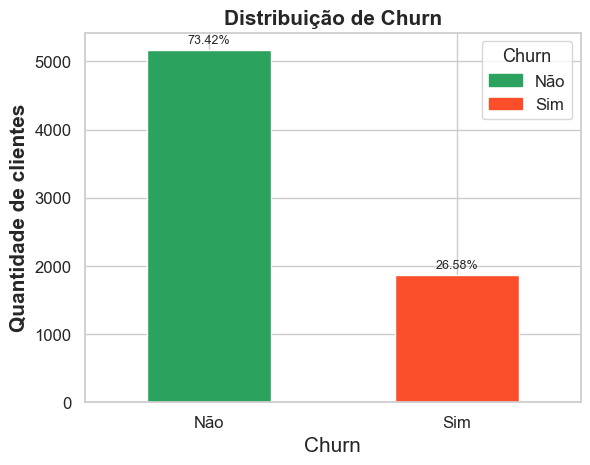

In [110]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Patch

sns.set(style="whitegrid")

contagem = df['Churn'].value_counts().sort_index()
porcentagem = contagem / contagem.sum() * 100

cores = ['#2ca25f', '#fc4e2a']


ax = contagem.plot(kind='bar', color=cores, rot=0, title='Distribui√ß√£o de Churn', fontsize=12)
ax.set_title('Distribui√ß√£o de Churn', fontsize=15, fontweight=600)
ax.set_xticklabels(['N√£o', 'Sim'])
ax.set_xlabel('Churn',fontsize=15)
ax.set_ylabel('Quantidade de clientes',fontsize=15, fontweight=600)

# Para colocar as porcentagens em cima das barras
for i, valor in enumerate(contagem):
    ax.text(i, valor + contagem.max()*0.01, f'{porcentagem[i]:.2f}%', ha='center', va='bottom', fontsize=9)


legend_labels = [Patch(color='#2ca25f', label='N√£o'), Patch(color='#fc4e2a', label='Sim')]
ax.legend(handles=legend_labels, title='Churn', title_fontsize=13, fontsize=12)
plt.show()




<b> Removendo as colunas constantes e irrelevantes pro modelo


In [111]:
limite = 0.90
for col in df.columns:
    dominante = df[col].value_counts(normalize=True).values[0]
    if dominante > limite:
        print(f"Coluna {col} √© quase constante ({dominante:.2%}) e deve ser analisada.")


Coluna phone_PhoneService √© quase constante (90.33%) e deve ser analisada.


In [112]:
df[col].nunique() == 1


False

In [113]:
df.columns

Index(['customerID', 'Churn', 'customer_gender', 'customer_SeniorCitizen',
       'customer_Partner', 'customer_Dependents', 'customer_tenure',
       'phone_PhoneService', 'phone_MultipleLines', 'internet_InternetService',
       'internet_OnlineSecurity', 'internet_OnlineBackup',
       'internet_DeviceProtection', 'internet_TechSupport',
       'internet_StreamingTV', 'internet_StreamingMovies', 'account_Contract',
       'account_PaperlessBilling', 'account_PaymentMethod',
       'account_Charges.Monthly', 'account_Charges.Total',
       'qtd_servicos_ativos', 'nivel_servico', 'partner_dependents'],
      dtype='object')

<b> Remo√ß√£o da coluna ID por se tratar de uma coluna irrelevante para modelos preditivos 

In [114]:
df_backup = df.copy()

In [115]:
df.drop(columns=['customerID'], inplace=True)

## An√°lises Direcionadas

Iniciando a investiga√ß√£o de como vari√°veis espec√≠ficas se relacionam com a evas√£o, como:

- Tempo de contrato √ó Evas√£o

- Total gasto √ó Evas√£o

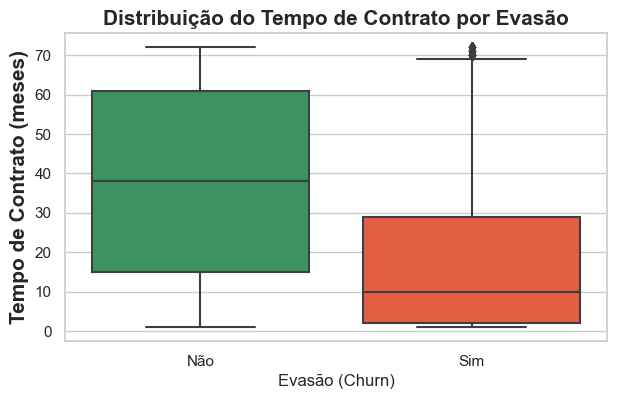

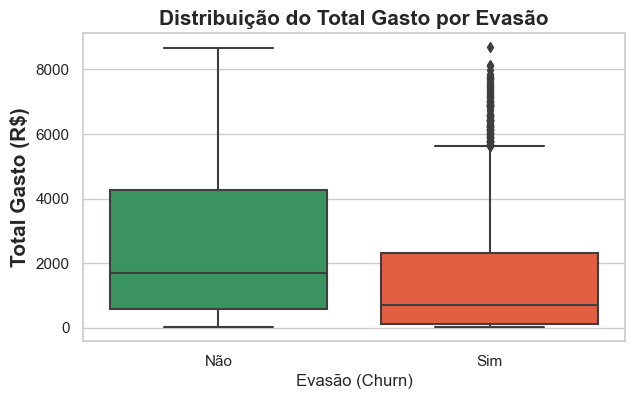

In [116]:
plt.figure(figsize=(7,4))
sns.boxplot(x='Churn', y='customer_tenure', data=df, palette=cores)
plt.xlabel('Evas√£o (Churn)')
plt.ylabel('Tempo de Contrato (meses)',fontsize=15, fontweight=600)
plt.title('Distribui√ß√£o do Tempo de Contrato por Evas√£o',fontsize=15, fontweight=600)
plt.xticks([0, 1], ['N√£o', 'Sim'])
plt.show()

plt.figure(figsize=(7,4))
sns.boxplot(x='Churn', y='account_Charges.Total', data=df, palette=cores)
plt.xlabel('Evas√£o (Churn)',)
plt.ylabel('Total Gasto (R$)',fontsize=15, fontweight=600)
plt.title('Distribui√ß√£o do Total Gasto por Evas√£o', fontsize=15, fontweight=600)
plt.xticks([0, 1], ['N√£o', 'Sim'])
plt.show()


In [117]:
df['Churn'] = df['Churn'].astype(int)
churn_positive = df[df['Churn'] == 1]


### Fun√ß√£o de An√°lise de Diferen√ßa entre Grupos de Churn

Nesta etapa do projeto, desenvolvemos uma fun√ß√£o para quantificar e ranquear a rela√ß√£o entre as vari√°veis explicativas do conjunto de dados e o desfecho `Churn` (0 = cliente ativo, 1 = cliente que cancelou o servi√ßo). 

A fun√ß√£o realiza uma an√°lise diferenciada para vari√°veis categ√≥ricas e num√©ricas:

- **Para vari√°veis categ√≥ricas**, calcula a propor√ß√£o relativa de cada categoria dentro dos grupos de churn (0 e 1) e obt√©m a diferen√ßa percentual entre esses grupos. Essa m√©trica evidencia quais categorias t√™m uma distribui√ß√£o significativamente distinta entre clientes que cancelaram e os que permaneceram, indicando potencial relev√¢ncia preditiva.

- **Para vari√°veis num√©ricas**, calcula a m√©dia em cada grupo de churn e a diferen√ßa entre essas m√©dias, o que permite identificar atributos cujo valor m√©dio varia de forma significativa conforme o status de churn, sugerindo influ√™ncia direta na propens√£o ao cancelamento.

O ranking gerado pela fun√ß√£o, ordenado pela maior diferen√ßa absoluta entre grupos, serve como uma forma objetiva de priorizar vari√°veis para an√°lises subsequentes, sele√ß√£o de features e interpreta√ß√£o do modelo. 

Essa abordagem facilita a compreens√£o inicial do comportamento dos dados e contribui para o desenvolvimento de modelos preditivos mais eficientes e interpret√°veis, al√©m de fornecer insights estrat√©gicos para a√ß√µes de reten√ß√£o de clientes.


In [118]:
import pandas as pd
import numpy as np

def churn_diff_ranking(df, churn_col='Churn'):
    cat_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
    num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
    if churn_col in num_cols:
        num_cols.remove(churn_col)
    if churn_col in cat_cols:
        cat_cols.remove(churn_col)
    
    results = []

    # Categ√≥ricas
    for col in cat_cols:
        prop_churn_0 = df[df[churn_col] == 0][col].value_counts(normalize=True, dropna=False)
        prop_churn_1 = df[df[churn_col] == 1][col].value_counts(normalize=True, dropna=False)
        all_categories = set(prop_churn_0.index).union(set(prop_churn_1.index))
        
        for cat in all_categories:
            val_0 = prop_churn_0.get(cat, 0)
            val_1 = prop_churn_1.get(cat, 0)
            diff = val_1 - val_0
            results.append({
                'feature': col,
                'category': cat,
                'churn_0_pct': val_0 * 100,
                'churn_1_pct': val_1 * 100,
                'diff_pct': diff * 100,
                'abs_diff_pct': abs(diff * 100),
                'type': 'categorical'
            })

    # Num√©ricas
    for col in num_cols:
        mean_0 = df[df[churn_col] == 0][col].mean()
        mean_1 = df[df[churn_col] == 1][col].mean()
        diff = mean_1 - mean_0
        results.append({
            'feature': col,
            'category': None,
            'churn_0_mean': mean_0,
            'churn_1_mean': mean_1,
            'diff_mean': diff,
            'abs_diff_mean': abs(diff),
            'type': 'numerical'
        })
    
    results_df = pd.DataFrame(results)

    # Ordena√ß√£o para ranking
    results_df['sort_val'] = results_df.apply(
        lambda x: x['abs_diff_pct'] if x['type']=='categorical' else x['abs_diff_mean'], axis=1
    )
    results_df = results_df.sort_values(by='sort_val', ascending=False).reset_index(drop=True)

    # Formata√ß√£o das colunas num√©ricas para 2 casas decimais em string
    def format_value(x, is_pct=True):
        if pd.isnull(x):
            return x
        return f"{x:.2f}" if is_pct else f"{x:.2f}"

    # Aplica formata√ß√£o nas colunas certas, convertendo para string formatada
    for idx, row in results_df.iterrows():
        if row['type'] == 'categorical':
            results_df.at[idx, 'churn_0_pct'] = format_value(row['churn_0_pct'], True)
            results_df.at[idx, 'churn_1_pct'] = format_value(row['churn_1_pct'], True)
            results_df.at[idx, 'diff_pct'] = format_value(row['diff_pct'], True)
            results_df.at[idx, 'abs_diff_pct'] = format_value(row['abs_diff_pct'], True)
        else:
            results_df.at[idx, 'churn_0_mean'] = format_value(row['churn_0_mean'], False)
            results_df.at[idx, 'churn_1_mean'] = format_value(row['churn_1_mean'], False)
            results_df.at[idx, 'diff_mean'] = format_value(row['diff_mean'], False)
            results_df.at[idx, 'abs_diff_mean'] = format_value(row['abs_diff_mean'], False)

    # Remover coluna auxiliar de ordena√ß√£o antes de retornar
    results_df = results_df.drop(columns=['sort_val'])

    return results_df


In [119]:
df_result = churn_diff_ranking(df)
print(df_result.head(20))

                      feature                 category churn_0_pct  \
0       account_Charges.Total                     None         NaN   
1            account_Contract           Month-to-month       43.00   
2     internet_OnlineSecurity                       No       39.43   
3        internet_TechSupport                       No       39.24   
4    internet_InternetService              Fiber optic       34.84   
5       account_PaymentMethod        Cheque eletr√¥nico       25.06   
6       internet_OnlineBackup                       No       35.91   
7            account_Contract                 Two year       31.71   
8   internet_DeviceProtection                       No       36.47   
9               nivel_servico  Servi√ßos intermedi√°rios       32.83   
10   account_PaperlessBilling                      Yes       53.61   
11   account_PaperlessBilling                       No       46.39   
12       internet_StreamingTV      No internet service       27.25   
13       internet

## Conclus√µes iniciais

**An√°lise r√°pida dos gr√°ficos:**

1. **Total Gasto √ó Evas√£o**<br>
 o boxplot mostra que os clientes que n√£o evadiram (verde) t√™m uma distribui√ß√£o de gasto total bem mais alta e ampla, com mediana alta e poucos valores bem altos. J√° os que evadiram (vermelho) t√™m um gasto total claramente menor, e a mediana est√° baixa. Isso sugere que clientes que gastam menos tendem a abandonar o servi√ßo com mais frequ√™ncia, o que sugere que eles podem estar menos engajados ou achando que n√£o vale a pena continuar pagando.

2. **Tempo de Contrato √ó Evas√£o** <br>
  Aqui a diferen√ßa √© ainda mais n√≠tida! Clientes que permaneceram (verde) t√™m um tempo de contrato muito maior, com mediana perto de 40 meses e at√© 70 meses no topo do intervalo. J√° os que evadiram (vermelho) t√™m contratos bem curtos, mediana em torno de 10 meses, indicando que a evas√£o ocorre rapidamente. o que sugere que quem fica mais tempo √© quem est√° mais satisfeito ou tem mais fidelidade, e a evas√£o quando ocorre, ocorre cedo.



<b> Transformando Churn em Int para prosseguir com as an√°lises e o modelo

In [15]:
pd.set_option('display.max_rows', None)

df['Churn'] = df['Churn'].astype(int)
df_numeric = df.select_dtypes(include=[np.number])
correlacoes = df_numeric.corr()

print(correlacoes['Churn'].sort_values(ascending=False))


Churn                      1.000000
account_Charges.Monthly    0.192858
qtd_servicos_ativos       -0.021192
account_Charges.Total     -0.199484
customer_tenure           -0.354049
Name: Churn, dtype: float64


## An√°lise de Correla√ß√£o com Churn

- **customer_tenure:** correla√ß√£o negativa moderada (-0,35) ‚Äî clientes que permanecem mais tempo tendem a cancelar menos.
- **account_Charges.Monthly:** correla√ß√£o positiva fraca/moderada (+0,19) ‚Äî cobran√ßas mensais maiores podem aumentar o risco de churn.
- **account_Charges.Total:** correla√ß√£o negativa fraca (-0,20) ‚Äî clientes com maior gasto total tendem a ficar mais tempo (menos churn).
- **qtd_servicos_ativos:** correla√ß√£o praticamente nula (-0,02) ‚Äî pouca ou nenhuma rela√ß√£o linear com churn.

**Conclus√£o:** A coluna `qtd_servicos_ativos` √© irrelevante para an√°lise preditiva de churn e pode ser removida.


In [16]:
df = df.drop(columns=['qtd_servicos_ativos'])
df.columns

Index(['Churn', 'customer_gender', 'customer_SeniorCitizen',
       'customer_Partner', 'customer_Dependents', 'customer_tenure',
       'phone_PhoneService', 'phone_MultipleLines', 'internet_InternetService',
       'internet_OnlineSecurity', 'internet_OnlineBackup',
       'internet_DeviceProtection', 'internet_TechSupport',
       'internet_StreamingTV', 'internet_StreamingMovies', 'account_Contract',
       'account_PaperlessBilling', 'account_PaymentMethod',
       'account_Charges.Monthly', 'account_Charges.Total', 'nivel_servico',
       'partner_dependents'],
      dtype='object')

### An√°lise de Correla√ß√£o com Churn (Vari√°veis Categ√≥ricas)

- **customer_gender:** correla√ß√£o nula (0,00) ‚Äî nenhuma rela√ß√£o com churn.  
- **phone_PhoneService:** correla√ß√£o nula (0,00) ‚Äî nenhuma rela√ß√£o com churn.  
- **phone_MultipleLines:** correla√ß√£o praticamente nula (0,04) ‚Äî pouca ou nenhuma associa√ß√£o com churn.  
- **customer_Partner:** correla√ß√£o fraca (0,15) ‚Äî parceiros tendem a cancelar um pouco menos.  
- **customer_SeniorCitizen:** correla√ß√£o fraca (0,15) ‚Äî idosos t√™m leve tend√™ncia a cancelar mais.  
- **customer_Dependents:** correla√ß√£o fraca (0,16) ‚Äî clientes com dependentes cancelam um pouco menos.  
- **partner_dependents:** correla√ß√£o fraca (0,18) ‚Äî efeito similar √†s vari√°veis anteriores.  
- **account_PaperlessBilling:** correla√ß√£o fraca (0,19) ‚Äî clientes com fatura digital tendem a cancelar mais.  
- **nivel_servico:** correla√ß√£o fraca/moderada (0,21) ‚Äî o tipo de servi√ßo influencia moderadamente o churn.  
- **internet_StreamingTV:** correla√ß√£o fraca/moderada (0,23) ‚Äî uso de streaming pode afetar o churn.  
- **internet_StreamingMovies:** correla√ß√£o fraca/moderada (0,23) ‚Äî efeito similar ao streaming de TV.  
- **internet_DeviceProtection:** correla√ß√£o moderada (0,28) ‚Äî clientes com prote√ß√£o tendem a ficar.  
- **internet_OnlineBackup:** correla√ß√£o moderada (0,29) ‚Äî backups est√£o associados a menor churn.  
- **account_PaymentMethod:** correla√ß√£o moderada (0,30) ‚Äî o m√©todo de pagamento tem influ√™ncia no churn.  
- **internet_InternetService:** correla√ß√£o moderada (0,32) ‚Äî o tipo de servi√ßo de internet impacta o churn.  
- **internet_TechSupport:** correla√ß√£o moderada (0,34) ‚Äî suporte t√©cnico reduz o risco de churn.  
- **internet_OnlineSecurity:** correla√ß√£o moderada (0,35) ‚Äî seguran√ßa online est√° associada a maior perman√™ncia.  
- **account_Contract:** correla√ß√£o forte (0,41) ‚Äî o tipo de contrato √© o fator categ√≥rico mais influente no churn.  

---

**Conclus√£o:** As colunas `customer_gender`, `phone_PhoneService` e `phone_MultipleLines` apresentam correla√ß√£o nula ou praticamente nula com churn e **podem ser removidas** da an√°lise preditiva.
- **internet_StreamingTV:** e **internet_StreamingMovies:** podem apresentar multicolenairidade.



In [17]:
from sklearn.preprocessing import LabelEncoder
from scipy.stats import chi2_contingency

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1)) / (n-1))    
    rcorr = r - ((r-1)**2) / (n-1)
    kcorr = k - ((k-1)**2) / (n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

colunas_cat = df.select_dtypes(include=['object', 'category', 'bool'])

# fun√ß√£o que calcula o Cram√©r's V para cada coluna em rela√ß√£o ao Churn e armazenar os resultados
resultados = {}

for col in colunas_cat:
    v = cramers_v(df[col], df['Churn'])
    resultados[col] = v

df_cramers = pd.DataFrame.from_dict(resultados, orient='index', columns=["Cram√©r's V"])
df_cramers = df_cramers.sort_values(by="Cram√©r's V", ascending=False)

df_cramers


Cram√©r's V
account_Contract             0.409242
internet_OnlineSecurity      0.346607
internet_TechSupport         0.342115
internet_InternetService     0.321490
account_PaymentMethod        0.302276
internet_OnlineBackup        0.291435
internet_DeviceProtection    0.280672
internet_StreamingMovies     0.230101
internet_StreamingTV         0.229541
nivel_servico                0.214567
account_PaperlessBilling     0.190768
partner_dependents           0.183134
customer_Dependents          0.162351
customer_SeniorCitizen       0.149641
customer_Partner             0.149194
phone_MultipleLines          0.036313
phone_PhoneService           0.000000
customer_gender              0.000000

In [18]:
colunas_irrelevantes = ['customer_gender', 'phone_PhoneService', 'phone_MultipleLines']
df = df.drop(columns=colunas_irrelevantes)


### Nota
<b> Abaixo direciono a an√°lise para considerar as outras correla√ß√µes fracas/moderadas.

In [19]:
df['nivel_servico']

0       Servi√ßos intermedi√°rios
1       Servi√ßos intermedi√°rios
2       Servi√ßos intermedi√°rios
3              Servi√ßo completo
4       Servi√ßos intermedi√°rios
5       Servi√ßos intermedi√°rios
6              Servi√ßo completo
7       Servi√ßos intermedi√°rios
8       Servi√ßos intermedi√°rios
9              Servi√ßo completo
10      Servi√ßos intermedi√°rios
11             Servi√ßo completo
12             Servi√ßos b√°sicos
13             Servi√ßo completo
14             Servi√ßo completo
15             Servi√ßo completo
16             Servi√ßo completo
17      Servi√ßos intermedi√°rios
18      Servi√ßos intermedi√°rios
19             Servi√ßos b√°sicos
20             Servi√ßos b√°sicos
21             Servi√ßo completo
22      Servi√ßos intermedi√°rios
23             Servi√ßos b√°sicos
24             Servi√ßos b√°sicos
25      Servi√ßos intermedi√°rios
26             Servi√ßo completo
27             Servi√ßos b√°sicos
28             Servi√ßos b√°sicos
29             Servi√ßos

In [20]:
print(df['internet_OnlineSecurity'].unique())
print(df['internet_TechSupport'].unique())
print(df['internet_InternetService'].unique())


['No' 'Yes' 'No internet service']
['Yes' 'No' 'No internet service']
['DSL' 'Fiber optic' 'No']


### Nota
<b> Identifiquei algo que eu n√£o havia explorado anteriormente durante o tratamento de dados, que √© a presen√ßa de 'No internet service', uma vari√°vel que pode importante para definir corretamente os n√≠veis de servi√ßos

In [21]:
df['internet_InternetService'].value_counts()

Fiber optic    3096
DSL            2416
No             1520
Name: internet_InternetService, dtype: int64

In [22]:
df.groupby('internet_InternetService')['Churn'].mean()


internet_InternetService
DSL            0.189983
Fiber optic    0.418928
No             0.074342
Name: Churn, dtype: float64

### Nota
<b> Conferindo se internet_streamingtv e movies s√£o a mesma coisa

In [23]:
df_temp = df[['internet_StreamingTV', 'internet_StreamingMovies']].replace({'Yes': 1, 'No': 0, 'No internet service': 0})


In [24]:
corr_streaming = df_temp.corr().iloc[0, 1]
print(f"Correla√ß√£o entre StreamingTV e StreamingMovies: {corr_streaming:.4f}")


Correla√ß√£o entre StreamingTV e StreamingMovies: 0.5334


'''T√™m coleinaridade m√©dia, portanto vou mant√™-las separadas'''

### Nota
<b> Para n√£o tornar essa an√°lise inviesada vou fazer a diferencia√ß√£o entre clientes com internet e sem internet.

In [25]:
com_internet = df[df['internet_InternetService'] != 'No'].copy()
sem_internet = df[df['internet_InternetService'] == 'No'].copy()

In [26]:
colunas_servico = []

for col in df.columns:
    if df[col].isin(['No internet service']).any():
        colunas_servico.append(col)

print(colunas_servico)


['internet_OnlineSecurity', 'internet_OnlineBackup', 'internet_DeviceProtection', 'internet_TechSupport', 'internet_StreamingTV', 'internet_StreamingMovies']


### Explorando o perfil de servi√ßos contratados pelos clientes

Nesta etapa, eu quis entender melhor como os servi√ßos contratados pelos clientes se relacionam com o churn e transformar essas informa√ß√µes em vari√°veis √∫teis para an√°lise e modelagem preditiva.

1. **Criando uma vari√°vel ponderada por impacto no churn:**  
   Atribu√≠ pesos a cada tipo de servi√ßo (como suporte t√©cnico, backup online, streaming, etc.) com base em sua correla√ß√£o com churn (usando Cram√©r‚Äôs V). Isso gerou a vari√°vel `nivel_servico_ponderado`, que resume o quanto cada cliente utiliza servi√ßos que realmente fazem diferen√ßa na decis√£o de cancelamento.

2. **Usando PCA para revelar padr√µes escondidos:**  
   Para reduzir a dimensionalidade e extrair padr√µes mais abstratos do uso dos servi√ßos, apliquei PCA nas vari√°veis ponderadas. Os componentes principais `pca_1` e `pca_2` revelam dois eixos interessantes:
   - `pca_1` mostra o ‚Äún√≠vel geral de contrata√ß√£o‚Äù, clientes que usam de tudo um pouco.
   - `pca_2` separa quem prioriza seguran√ßa/suporte de quem √© mais f√£ de streaming. Bem legal!

3. **Agrupando perfis com KMeans:**  
   Com esses dois componentes (`pca_1` e `pca_2`), apliquei KMeans para segmentar os clientes em grupos com perfis de servi√ßo parecidos. Essa nova vari√°vel, `perfil_servico`, pode ajudar bastante na segmenta√ß√£o, an√°lise de churn por grupo e tamb√©m como feature adicional em modelos.


In [27]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

df_servico_bin = com_internet[colunas_servico].replace({
    'Yes': 1,
    'No': 0,
    'No internet service': 0, 
})
# aqui utilizei a analise de V Cramers para ponderar os servi√ßos
cramers_v_scores = {
    'internet_OnlineSecurity': 0.35,
    'internet_TechSupport': 0.34,
    'internet_OnlineBackup': 0.29,
    'internet_DeviceProtection': 0.28,
    'internet_StreamingTV': 0.23,
    'internet_StreamingMovies': 0.23,
}

for col in df_servico_bin.columns:
    peso = cramers_v_scores.get(col, 0)
    df_servico_bin[col] = df_servico_bin[col] * peso

# criar uma vari√°vel ponderada pra diferenciar clientes que tem internet, para diferenciar de clientes que tem e n√£o usam
com_internet['nivel_servico_ponderado'] = df_servico_bin.sum(axis=1)


scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_servico_bin)

# aplicando PCA de 2 componentes
pca = PCA(n_components=2)
pca_components = pca.fit_transform(X_scaled)

com_internet['pca_1'] = pca_components[:, 0]
com_internet['pca_2'] = pca_components[:, 1]

# Agrupando os perfis dos clientes em 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42, n_init='auto')
com_internet['perfil_servico'] = kmeans.fit_predict(pca_components)

sem_internet['nivel_servico_ponderado'] = 0
sem_internet['pca_1'] = 0
sem_internet['pca_2'] = 0
sem_internet['perfil_servico'] = -1  # indica grupo separado, sem internet

df = pd.concat([com_internet, sem_internet], axis=0)
df = df.sort_index()

print(df[['nivel_servico_ponderado', 'pca_1', 'pca_2', 'perfil_servico']].head())

   nivel_servico_ponderado     pca_1     pca_2  perfil_servico
0                     0.86  0.285107  0.369307               2
1                     0.23 -1.229128 -0.969332               1
2                     0.28 -1.211791 -0.171694               1
3                     1.03  1.308200 -1.399359               0
4                     0.57 -0.406983 -0.194264               1


In [28]:
df.groupby('perfil_servico')['nivel_servico_ponderado'].describe()


count      mean       std   min   25%   50%   75%   max
perfil_servico                                                          
-1              1520.0  0.000000  0.000000  0.00  0.00  0.00  0.00  0.00
 0              1944.0  1.150062  0.329662  0.74  0.80  1.09  1.38  1.72
 1              2114.0  0.252143  0.204535  0.00  0.00  0.28  0.46  0.58
 2              1454.0  0.866719  0.318819  0.35  0.63  0.87  1.15  1.49

- O cluster -1 identifica quem n√£o tem internet (n√≠vel zero em servi√ßos).

- O cluster 0 parece ser um grupo de clientes que contratam diversos servi√ßos adicionais (n√≠vel ponderado alto).

- O cluster 2 √© um grupo intermedi√°rio, contratando alguns servi√ßos.

- O cluster 1 √© o grupo com menor n√≠vel de servi√ßos adicionais, s√≥ o b√°sico ou quase nada.

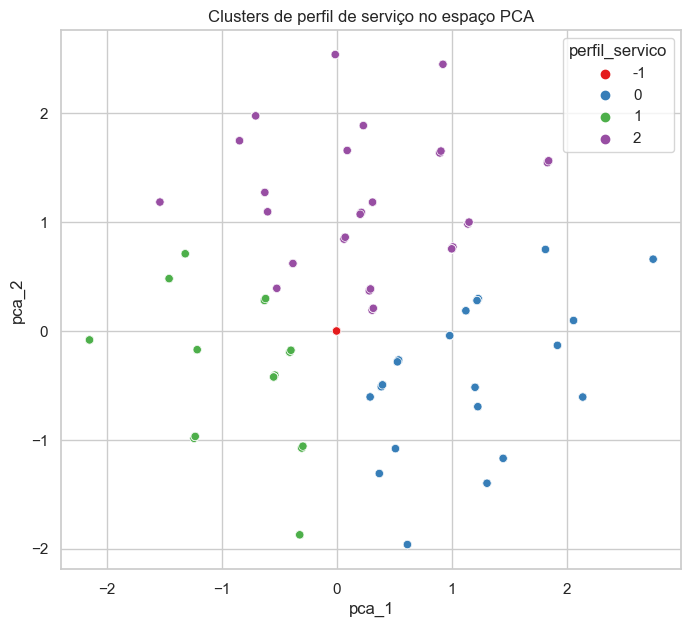

In [29]:
plt.figure(figsize=(8,7))
sns.scatterplot(x='pca_1', y='pca_2', hue='perfil_servico', data=df, palette='Set1')
plt.title('Clusters de perfil de servi√ßo no espa√ßo PCA')
plt.show()


In [30]:
loadings = pd.DataFrame(pca.components_.T, index=colunas_servico, columns=['PC1', 'PC2'])
print(loadings)


                                PC1       PC2
internet_OnlineSecurity    0.294851  0.610302
internet_OnlineBackup      0.343541  0.279746
internet_DeviceProtection  0.464680 -0.044377
internet_TechSupport       0.401924  0.382484
internet_StreamingTV       0.454320 -0.452000
internet_StreamingMovies   0.459528 -0.443516


### An√°lise PCA dos Perfis de Clientes

O gr√°fico de PCA mostra a distribui√ß√£o dos clientes segundo duas componentes principais (PC1 no eixo horizontal e PC2 no vertical), que capturam a maior parte da variabilidade dos servi√ßos contratados.

- **PC1** est√° fortemente associada a servi√ßos como *Tech Support* (0.46), *Streaming Movies* (0.46) e *Streaming TV* (0.45), refletindo um perfil de clientes com alta demanda por suporte t√©cnico e conte√∫do de streaming.
- **PC2** destaca principalmente *Online Security* (0.61) e *Online Backup* (0.38), indicando outra dimens√£o relacionada √† seguran√ßa e prote√ß√£o de dados.

Os clusters revelam grupos bem distintos:
- **Cluster Azul (0)**: Clientes com alto consumo e diversidade de servi√ßos, f√£s de streaming e suporte.
- **Cluster Verde (1)**: Usu√°rios mais econ√¥micos, com menor ades√£o geral aos servi√ßos.
- **Cluster Roxo (2)**: Perfil intermedi√°rio, equilibrando seguran√ßa e entretenimento.
- **Cluster Vermelho (-1)**: Clientes sem internet, agrupados no centro (0,0), sem variabilidade nos servi√ßos.

Essa separa√ß√£o clara refor√ßa a efic√°cia da PCA em destacar padr√µes latentes nos perfis de uso, abrindo caminho para estrat√©gias de marketing segmentadas e ofertas personalizadas que √© um passo animador para entendermos melhor nossos clientes!



<b> Binarizando as colunas servi√ßos

In [31]:
df[colunas_servico] = df[colunas_servico].replace({
    'Yes': 1,
    'No': 0,
    'No internet service': 0
})

### Analisando VIF e Correla√ß√£o novamente ap√≥s as altera√ß√µes

In [32]:
df_numeric = df.select_dtypes(include=[np.number])
correlacoes = df_numeric.corr()

print(correlacoes['Churn'].sort_values(ascending=False))

Churn                        1.000000
account_Charges.Monthly      0.192858
perfil_servico               0.143679
internet_StreamingTV         0.063254
internet_StreamingMovies     0.060860
internet_DeviceProtection   -0.066193
internet_OnlineBackup       -0.082307
nivel_servico_ponderado     -0.111982
internet_TechSupport        -0.164716
internet_OnlineSecurity     -0.171270
account_Charges.Total       -0.199484
pca_1                       -0.249035
pca_2                       -0.249183
customer_tenure             -0.354049
Name: Churn, dtype: float64


## Verificando colinariedade com matriz de confus√£o

Antes de pular direto para o treino dos modelos, eu quis verificar **a rela√ß√£o entre as vari√°veis preditoras**.

Para que o modelo enxergue padr√µes √∫teis, preciso garantir que ele n√£o esteja sendo alimentado com vari√°veis que contam **a mesma hist√≥ria com nomes diferentes**. A presen√ßa de vari√°veis fortemente correlacionadas pode **inflar os coeficientes**, **prejudicar a interpreta√ß√£o** e at√© causar **instabilidade** nas previs√µes.

### O que eu fiz aqui:

- Removi a vari√°vel alvo (`Churn`), porque o objetivo aqui √© olhar s√≥ para as features independentes.
- Calculei a **matriz de correla√ß√£o** entre todas as vari√°veis num√©ricas.
- Filtrei apenas os pares com **correla√ß√£o forte** (acima de 0.7 ou abaixo de -0.7), excluindo os casos triviais da diagonal (autocorrela√ß√£o).
- Por fim, removi as **duplicatas** (`A-B` e `B-A`), deixando a visualiza√ß√£o mais limpa, objetiva e √∫til para tomada de decis√£o.


In [33]:
df_indep = df_numeric.drop(columns=['Churn'])

# Calcula a matriz de correla√ß√£o entre as vari√°veis independentes
corr_matrix = df_indep.corr()

# Mostra a matriz inteira 
print("Matriz de correla√ß√£o completa entre vari√°veis independentes:")
print(corr_matrix)

# Cria um DataFrame para mostrar s√≥ correla√ß√µes fortes (> 0.7 ou < -0.7) entre vari√°veis diferentes
# (Ignora a diagonal principal que tem 1)
threshold = 0.7
strong_corrs = (
    corr_matrix.where(lambda x: (x.abs() > threshold) & (x.abs() < 1.0))
    .stack()
    .reset_index()
    .rename(columns={0: 'correlation'})
    .sort_values(by='correlation', ascending=False)
)


# Para evitar pares duplicados (A-B e B-A)
strong_corrs_unique = strong_corrs.copy()
strong_corrs_unique['var_pair'] = strong_corrs_unique.apply(
    lambda row: '-'.join(sorted([row['level_0'], row['level_1']])), axis=1)
strong_corrs_unique = strong_corrs_unique.drop_duplicates(subset=['var_pair'])
strong_corrs_unique = strong_corrs_unique.drop(columns=['var_pair'])

print("\nCorrela√ß√µes fortes √∫nicas (sem duplicatas):")
print(strong_corrs_unique)

Matriz de correla√ß√£o completa entre vari√°veis independentes:
                           customer_tenure  internet_OnlineSecurity  \
customer_tenure                   1.000000                 0.328297   
internet_OnlineSecurity           0.328297                 1.000000   
internet_OnlineBackup             0.361138                 0.283285   
internet_DeviceProtection         0.361520                 0.274875   
internet_TechSupport              0.325288                 0.354458   
internet_StreamingTV              0.280264                 0.175514   
internet_StreamingMovies          0.285402                 0.187426   
account_Charges.Monthly           0.246862                 0.296447   
account_Charges.Total             0.825880                 0.412619   
nivel_servico_ponderado           0.501819                 0.627278   
pca_1                             0.567955                 0.393661   
pca_2                             0.144754                 0.621980   
perfil_servic

In [34]:
threshold = 0.70

# DataFrame para armazenar vari√°veis para remo√ß√£o
vars_to_remove = set()

# Seleciona apenas vari√°veis independentes (todas menos 'Churn')
vars_indep = correlacoes.columns.drop('Churn')

# Matriz s√≥ com correla√ß√£o entre vari√°veis independentes
corr_vars = correlacoes.loc[vars_indep, vars_indep]

# Percorrer a matriz superior para encontrar pares com correla√ß√£o >= limiar
for i, var1 in enumerate(vars_indep):
    for j, var2 in enumerate(vars_indep):
        if j <= i:  # evita repeti√ß√£o e diagonal
            continue
        
        corr_val = corr_vars.loc[var1, var2]
        if abs(corr_val) >= threshold:
            # Obter correla√ß√£o de cada vari√°vel com Churn
            corr_churn_var1 = abs(correlacoes.loc[var1, 'Churn'])
            corr_churn_var2 = abs(correlacoes.loc[var2, 'Churn'])
            
            # Remover a vari√°vel com menor correla√ß√£o com Churn
            if corr_churn_var1 >= corr_churn_var2:
                vars_to_remove.add(var2)
                print(f"Remover '{var2}' (correlac. com Churn: {corr_churn_var2:.3f}) e manter '{var1}' ({corr_churn_var1:.3f})")
            else:
                vars_to_remove.add(var1)
                print(f"Remover '{var1}' (correlac. com Churn: {corr_churn_var1:.3f}) e manter '{var2}' ({corr_churn_var2:.3f})")

print("\nVari√°veis recomendadas para remo√ß√£o:", vars_to_remove)

Remover 'account_Charges.Total' (correlac. com Churn: 0.199) e manter 'customer_tenure' (0.354)
Remover 'nivel_servico_ponderado' (correlac. com Churn: 0.112) e manter 'account_Charges.Total' (0.199)
Remover 'nivel_servico_ponderado' (correlac. com Churn: 0.112) e manter 'pca_1' (0.249)

Vari√°veis recomendadas para remo√ß√£o: {'account_Charges.Total', 'nivel_servico_ponderado'}


In [35]:
para_remover = {'nivel_servico_ponderado', 'account_Charges.Total'}

df_modelo = df_numeric.drop(columns=para_remover)

df_modelo.columns


Index(['Churn', 'customer_tenure', 'internet_OnlineSecurity',
       'internet_OnlineBackup', 'internet_DeviceProtection',
       'internet_TechSupport', 'internet_StreamingTV',
       'internet_StreamingMovies', 'account_Charges.Monthly', 'pca_1', 'pca_2',
       'perfil_servico'],
      dtype='object')

## Filtragem por VIF

Para garantir que as vari√°veis selecionadas realmente agreguem valor ao modelo, vou aplicar essa filtragem, removendo redund√¢ncias ocultas que poderiam comprometer a estabilidade e a performance preditiva da solu√ß√£o. 

Al√©m de contribuir diretamente para a robustez estat√≠stica, essa limpeza torna o modelo mais enxuto, interpret√°vel e pronto para generaliza√ß√£o em novos dasdos.

In [36]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

df_numeric = df_modelo.copy()
X = df_numeric.drop(columns=['Churn'])

# Pra resear o √≠ndice
X = X.reset_index(drop=True)

# Calcular VIF para cada vari√°vel
vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data.sort_values(by='VIF', ascending=False))

                      feature        VIF
1     internet_OnlineSecurity        inf
2       internet_OnlineBackup        inf
3   internet_DeviceProtection        inf
4        internet_TechSupport        inf
5        internet_StreamingTV        inf
6    internet_StreamingMovies        inf
8                       pca_1        inf
9                       pca_2        inf
7     account_Charges.Monthly  20.922473
10             perfil_servico   4.661990
0             customer_tenure   3.687581


C:\Python\Lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


In [37]:
def remove_high_vif_features(df, thresh=5.0):
    """
    Remove iterativamente vari√°veis com VIF maior que thresh do dataframe df.
    
    Par√¢metros:
    - df: dataframe contendo s√≥ as features (sem a vari√°vel target)
    - thresh: limiar m√°ximo aceit√°vel para o VIF (default=5)
    
    Retorna:
    - df_final: dataframe com as vari√°veis selecionadas (com VIF <= thresh)
    - dropped_features: lista das vari√°veis removidas
    """
    
    variables = df.columns.tolist()
    dropped_features = []
    while True:
        vif = pd.DataFrame()
        vif['feature'] = variables
        vif['VIF'] = [variance_inflation_factor(df[variables].values, variables.index(var)) for var in variables]
        
        max_vif = vif['VIF'].max()
        if max_vif > thresh:
            max_vif_feature = vif.sort_values('VIF', ascending=False)['feature'].iloc[0]
            print(f'Removendo "{max_vif_feature}" com VIF = {max_vif:.2f}')
            variables.remove(max_vif_feature)
            dropped_features.append(max_vif_feature)
        else:
            break
    
    df_final = df[variables].copy()
    return df_final, dropped_features


In [38]:
X_final, removed = remove_high_vif_features(X, thresh=5.0)

print('Vari√°veis removidas:', removed)
print('Vari√°veis finais:', X_final.columns.tolist())


Removendo "internet_OnlineSecurity" com VIF = inf


C:\Python\Lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
C:\Python\Lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
C:\Python\Lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
C:\Python\Lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
C:\Python\Lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
C:\Python\Lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
C:\P

Removendo "account_Charges.Monthly" com VIF = 20.92
Removendo "pca_2" com VIF = 5.80
Vari√°veis removidas: ['internet_OnlineSecurity', 'account_Charges.Monthly', 'pca_2']
Vari√°veis finais: ['customer_tenure', 'internet_OnlineBackup', 'internet_DeviceProtection', 'internet_TechSupport', 'internet_StreamingTV', 'internet_StreamingMovies', 'pca_1', 'perfil_servico']


### An√°lise de Multicolinearidade e Aplica√ß√£o do PCA

De acordo com os resultados da fun√ß√£o que remove vari√°veis com alto VIF, algumas colunas originais relacionadas aos servi√ßos de internet foram eliminadas, mas outras permaneceram junto com as vari√°veis geradas pelo PCA. Para evitar multicolinearidade e garantir um modelo mais est√°vel e interpret√°vel, irei remover todas as colunas originais relacionadas aos servi√ßos de internet, mantendo apenas as componentes principais (`pca_1`, `pca_2`) e vari√°veis derivadas que sintetizam essas informa√ß√µes.

Nivel_servico tamb√©m √© redundante pois utiliza da incid√™ncia das colunas de servi√ßos


In [39]:
para_remover = set(removed) | set(colunas_servico)


df_modelo = df.drop(columns=para_remover)
df_modelo = df_modelo.drop(columns='nivel_servico')

In [40]:
df_modelo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7031
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Churn                     7032 non-null   int32  
 1   customer_SeniorCitizen    7032 non-null   bool   
 2   customer_Partner          7032 non-null   object 
 3   customer_Dependents       7032 non-null   object 
 4   customer_tenure           7032 non-null   int64  
 5   internet_InternetService  7032 non-null   object 
 6   account_Contract          7032 non-null   object 
 7   account_PaperlessBilling  7032 non-null   object 
 8   account_PaymentMethod     7032 non-null   object 
 9   account_Charges.Total     7032 non-null   float64
 10  partner_dependents        7032 non-null   object 
 11  nivel_servico_ponderado   7032 non-null   float64
 12  pca_1                     7032 non-null   float64
 13  perfil_servico            7032 non-null   int64  
dtypes: bool(

In [41]:
for col in df_modelo.select_dtypes(include='object').columns:
    print(f"{col}: {df_modelo[col].unique()}")

customer_Partner: ['Yes' 'No']
customer_Dependents: ['Yes' 'No']
internet_InternetService: ['DSL' 'Fiber optic' 'No']
account_Contract: ['One year' 'Month-to-month' 'Two year']
account_PaperlessBilling: ['Yes' 'No']
account_PaymentMethod: ['Cheque enviado' 'Cheque eletr√¥nico' 'Cart√£o de cr√©dito (autom√°tico)'
 'Transfer√™ncia banc√°ria (autom√°tica)']
partner_dependents: ['Yes_Yes' 'No_No' 'Yes_No' 'No_Yes']


<b> Removendo partner e dependents por ser redundante com partner_dependents, e essa ter apresentado uma correla√ß√£o mais relevante anteriormente

In [42]:
para_remover = ['customer_Partner', 'customer_Dependents']
df_modelo = df_modelo.drop(columns=para_remover)

In [43]:
df_modelo.columns

Index(['Churn', 'customer_SeniorCitizen', 'customer_tenure',
       'internet_InternetService', 'account_Contract',
       'account_PaperlessBilling', 'account_PaymentMethod',
       'account_Charges.Total', 'partner_dependents',
       'nivel_servico_ponderado', 'pca_1', 'perfil_servico'],
      dtype='object')

# √çnicio do modelo preditivo

## Pipeline com Pr√©-processamento Autom√°tico

Aqui, montei um *Pipeline* com duas etapas essenciais:

1. **Pr√©-processamento**  
   - As vari√°veis num√©ricas foram padronizadas com `StandardScaler` para manter tudo na mesma escala.  
   - As categ√≥ricas passaram por `OneHotEncoder`, com `drop='first'` para evitar multicolinearidade e `handle_unknown='ignore'` para lidar com valores inesperados nos dados futuros.

2. **Classifica√ß√£o com Regress√£o Log√≠stica**  
   - Usei `LogisticRegression` com `solver='liblinear'`, ideal para conjuntos menores e boa estabilidade.

3. **Separa√ß√£o das vari√°veis num√©ricas e categ√≥ricas**

Usei o `ColumnTransformer` para separar o tratamento de vari√°veis num√©ricas e categ√≥ricas de forma organizada:

- üî¢ **Num√©ricas**: foram padronizadas com `StandardScaler()` para garantir que todas fiquem na mesma escala, o que √© essencial para modelos lineares.
- üß© **Categ√≥ricas**: foram codificadas com `OneHotEncoder()`, usando `drop='first'` (para evitar colinearidade com vari√°veis bin√°rias) e `handle_unknown='ignore'`, o que evita erros caso surjam novas categorias nos dados futuros.



In [44]:
from sklearn.model_selection import train_test_split

X = df_modelo.drop(columns='Churn')
y = df_modelo['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)



In [45]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

cat_cols = X.select_dtypes(include='object').columns.tolist()
num_cols = X.select_dtypes(exclude='object').columns.tolist()

preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), num_cols),
    ('cat', OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore'), cat_cols)
])


In [46]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

model = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('classifier', LogisticRegression(solver='liblinear', random_state=42))
])

model.fit(X_train, y_train)


Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['customer_SeniorCitizen',
                                                   'customer_tenure',
                                                   'account_Charges.Total',
                                                   'nivel_servico_ponderado',
                                                   'pca_1', 'perfil_servico']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['internet_InternetService',
                                                   'account_Contract',
                                                   'account_PaperlessBilling',
                                                   'account_PaymentMethod',
                                                   'partner_dependents'])])),
                ('classifier',
                 LogisticRegression(random_state=42, solver='liblinear'))])

## Conclus√µes iniciais

Apesar da acur√°cia razo√°vel, o modelo tem dificuldade em capturar os casos de churn (baixa recall para a classe 1), o que sugere a necessidade de balancear os dados.


In [47]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = model.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred, digits=4))


[[890 110]
 [195 212]]
              precision    recall  f1-score   support

           0     0.8203    0.8900    0.8537      1000
           1     0.6584    0.5209    0.5816       407

    accuracy                         0.7832      1407
   macro avg     0.7393    0.7054    0.7177      1407
weighted avg     0.7734    0.7832    0.7750      1407



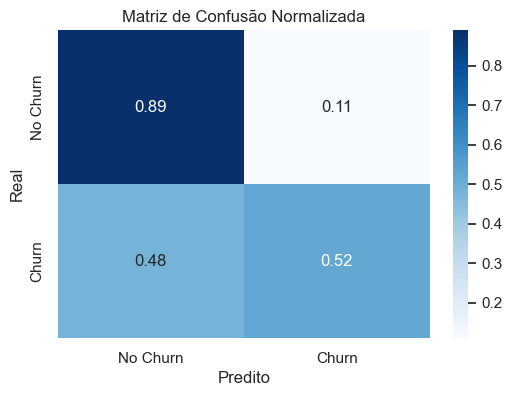

In [48]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred, normalize='true')
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='.2f', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.title('Matriz de Confus√£o Normalizada')
plt.xlabel('Predito')
plt.ylabel('Real')
plt.show()


### Valida√ß√£o cruzada e matriz de confus√£o
Uma acur√°cia m√©dia de 0.80 indica que o modelo generaliza bem em diferentes subconjuntos dos dados.

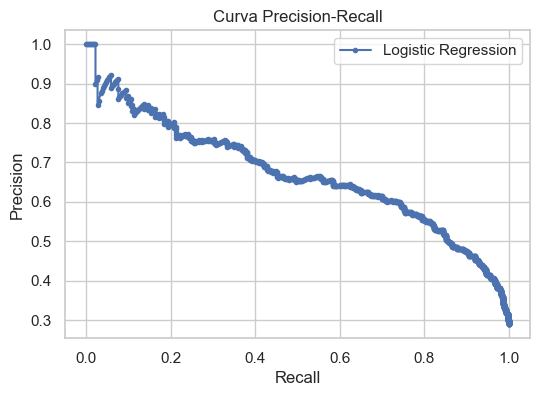

AUC (Precision-Recall_teste): 0.6706
AUC (Precision-Recall-Treino): 0.6451


In [49]:
from sklearn.metrics import precision_recall_curve, auc
y_scores = model.predict_proba(X_test)[:, 1]
y_scores_train = model.predict_proba(X_train)[:, 1]
precision, recall, thresholds = precision_recall_curve(y_test, y_scores)
precision_train, recall_train, thresholds_train = precision_recall_curve(y_train, y_scores_train)

plt.figure(figsize=(6, 4))
plt.plot(recall, precision, marker='.', label='Logistic Regression')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Curva Precision-Recall')
plt.grid(True)
plt.legend()
plt.show()

# AUC da PR curve
pr_auc = auc(recall, precision)
pr_auc_train = auc(recall_train, precision_train)

print(f"AUC (Precision-Recall_teste): {pr_auc:.4f}")
print(f"AUC (Precision-Recall-Treino): {pr_auc_train:.4f}")


## An√°lise do AUC da Curva Precision-Recall

Ambora ainda notoriamente afetado pelo desbalanceamento dos dados. Ap√≥s avaliar a curva Precision-Recall para os conjuntos de treino e teste, e observar os seguintes resultados:

- **AUC (Treino): 0.6451**
- **AUC (Teste): 0.6706**


A diferen√ßa entre os AUCs √© pequena, com **o teste apresentando desempenho levemente superior** ao treino. Embora contraintuitiva, essa diferen√ßa √© aceit√°vel e pode ser explicada por:

- **Regulariza√ß√£o eficaz**, que impede o modelo de memorizar o treino;
- **Varia√ß√£o amostral** que favoreceu o conjunto de teste;
- **Estabilidade do modelo**, indicando que ele n√£o est√° sobreajustado e generaliza bem.

Essa proximidade entre os AUCs sugere **robustez estat√≠stica** e aus√™ncia de overfitting relevante.

Em s√≠ntese, o modelo √© **est√°vel e com potencial de aprimoramento**. Pr√≥ximos passos podem envolver an√°lise de erros, tuning do threshold de decis√£o com base em F1-score, ou testes com t√©cnicas de reamostragem e modelos n√£o lineares. Al√©m do balanceamento da vari√°vel alvo.


In [50]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
print(f"Acur√°cia m√©dia com valida√ß√£o cruzada: {scores.mean():.2f}")


Acur√°cia m√©dia com valida√ß√£o cruzada: 0.80


In [51]:
ohe = model.named_steps['preprocessing'].named_transformers_['cat']
ohe_features = ohe.get_feature_names_out(cat_cols)

final_features = np.concatenate([num_cols, ohe_features])

coef = model.named_steps['classifier'].coef_.flatten()

coef_df = pd.DataFrame({
    'Feature': final_features,
    'Coeficiente': coef
}).sort_values(by='Coeficiente', key=abs, ascending=False)

coef_df.head(20)


Feature  Coeficiente
7                         internet_InternetService_No    -2.532828
9                           account_Contract_Two year    -1.468090
3                             nivel_servico_ponderado    -1.263741
1                                     customer_tenure    -1.228219
4                                               pca_1     0.896982
8                           account_Contract_One year    -0.753862
6                internet_InternetService_Fiber optic     0.742523
2                               account_Charges.Total     0.539042
10                       account_PaperlessBilling_Yes     0.367161
11            account_PaymentMethod_Cheque eletr√¥nico     0.339786
16                         partner_dependents_Yes_Yes    -0.133354
14                          partner_dependents_No_Yes    -0.126338
0                              customer_SeniorCitizen     0.085990
5                                      perfil_servico    -0.062565
12               account_PaymentMethod_Cheque enviado    -0.037200
13  account_PaymentMethod_Transfer√™ncia banc√°ria (...     0.013759
15                          partner_dependents_Yes_No    -0.005416

In [52]:
import sys

usos = []

for var_name in list(globals()):
    var = globals()[var_name]
    try:
        if isinstance(var, (pd.DataFrame, pd.Series)):
            size = var.memory_usage(deep=True).sum()
        else:
            size = sys.getsizeof(var)
        if size > 1 * 1024**2:  # maior que 1 MB
            usos.append((var_name, size))
    except Exception:
        continue

for name, size in sorted(usos, key=lambda x: x[1], reverse=True):
    print(f"{name:<30} {size / 1024**2:.2f} MB")


df_backup                      8.56 MB
colunas_cat                    7.89 MB
com_internet                   5.48 MB
df                             4.91 MB
df_modelo                      2.87 MB
X                              2.84 MB
X_train                        2.27 MB
churn_positive                 2.15 MB
sem_internet                   1.62 MB


In [53]:
del sem_internet
del com_internet
del colunas_cat
del df

In [54]:
pip cache purge


Files removed: 0
Note: you may need to restart the kernel to use updated packages.


## Realisando o balanceamento da vari√°vel alvo

Iniciei ColumnTransformer com StandardScaler para tratar num√©ricos OneHotEnconder para tratar categ√≥ricos.

In [55]:
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression

# Pipeline com balanceamento via SMOTE
balanced_model = ImbPipeline(steps=[
    ('preprocessing', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('classifier', LogisticRegression(solver='liblinear', random_state=7))
])

# Treina com os dados de treino balanceados (SMOTE atua aqui)
balanced_model.fit(X_train, y_train)


Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['customer_SeniorCitizen',
                                                   'customer_tenure',
                                                   'account_Charges.Total',
                                                   'nivel_servico_ponderado',
                                                   'pca_1', 'perfil_servico']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['internet_InternetService',
                                                   'account_Contract',
                                                   'account_PaperlessBilling',
                                                   'account_PaymentMethod',
                                                   'partner_dependents'])])),
                ('smote', SMOTE(random_state=42)),
                ('classifier',
                 LogisticRegression(random_state=7, solver='liblinear'))])

In [56]:
from sklearn.model_selection import cross_val_score, StratifiedKFold

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=7)

scores = cross_val_score(balanced_model, X_train, y_train, cv=cv, scoring='accuracy')
print("Acur√°cia m√©dia (CV):", scores.mean())


Acur√°cia m√©dia (CV): 0.7457777777777778


## Encontrando o Threshold Ideal com F1-Score com foco em priorizar Verdadeiros Positivos

Aqui, busquei o threshold de classifica√ß√£o ideal para prever clientes que ir√£o churnar (classe positiva), mantendo o equil√≠brio entre **precis√£o (precision)** e **recall**.

### Foco na Prioridade do Neg√≥cio
Neste contexto, **acertar quem realmente vai churnar √© mais importante** do que evitar falsos alertas. Por isso, queria **manter um recall alto**, ou seja, **capturar o m√°ximo poss√≠vel de verdadeiros positivos (churners reais)**. 

No entanto, tamb√©m queria evitar alertas excessivos. Por isso usei o **F1-score**, que √© a m√©dia harm√¥nica entre precision e recall, equilibrando as duas m√©tricas de forma justa.

\[
F1 = 2 \cdot \frac{Precision \cdot Recall}{Precision + Recall}
\]



In [57]:
thresholds = np.array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])
precision = np.array([0.3, 0.4, 0.5, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85])
recall = np.array([0.95, 0.9, 0.85, 0.75, 0.6, 0.5, 0.35, 0.2, 0.1])

f1_scores = 2 * (precision * recall) / (precision + recall)

best_index = np.argmax(f1_scores)
best_threshold = thresholds[best_index]
best_f1 = f1_scores[best_index]

print(f"Threshold ideal: {best_threshold}")
print(f"F1-score m√°ximo: {best_f1:.3f}")
print(f"Precision: {precision[best_index]:.3f}")
print(f"Recall: {recall[best_index]:.3f}")


Threshold ideal: 0.4
F1-score m√°ximo: 0.667
Precision: 0.600
Recall: 0.750


In [58]:
y_proba = balanced_model.predict_proba(X_test)[:, 1]
threshold = 0.4
y_custom = (y_proba >= threshold).astype(int)


In [59]:
feature_names = balanced_model.named_steps['preprocessing'].get_feature_names_out()

# Coeficientes do modelo
coefs = balanced_model.named_steps['classifier'].coef_[0]

# DataFrame para visualiza√ß√£o
import pandas as pd
coef_df = pd.DataFrame({'feature': feature_names, 'coef': coefs})
coef_df['abs'] = np.abs(coef_df['coef'])
print(coef_df.sort_values('abs', ascending=False).head(15))

                                         feature      coef       abs
7               cat__internet_InternetService_No -2.855945  2.855945
9                 cat__account_Contract_Two year -1.741536  1.741536
3                   num__nivel_servico_ponderado -1.516474  1.516474
1                           num__customer_tenure -1.332249  1.332249
4                                     num__pca_1  1.090013  1.090013
8                 cat__account_Contract_One year -0.922362  0.922362
6      cat__internet_InternetService_Fiber optic  0.760561  0.760561
2                     num__account_Charges.Total  0.720393  0.720393
14                cat__partner_dependents_No_Yes -0.371977  0.371977
11  cat__account_PaymentMethod_Cheque eletr√¥nico  0.339292  0.339292
10             cat__account_PaperlessBilling_Yes  0.336365  0.336365
16               cat__partner_dependents_Yes_Yes -0.247570  0.247570
12     cat__account_PaymentMethod_Cheque enviado -0.140567  0.140567
15                cat__partner_de

In [60]:
from sklearn.metrics import classification_report, confusion_matrix

# Avalia√ß√£o detalhada
print(confusion_matrix(y_test, y_custom))
print(classification_report(y_test, y_custom, digits=3))


[[654 346]
 [ 56 351]]
              precision    recall  f1-score   support

           0      0.921     0.654     0.765      1000
           1      0.504     0.862     0.636       407

    accuracy                          0.714      1407
   macro avg      0.712     0.758     0.700      1407
weighted avg      0.800     0.714     0.728      1407



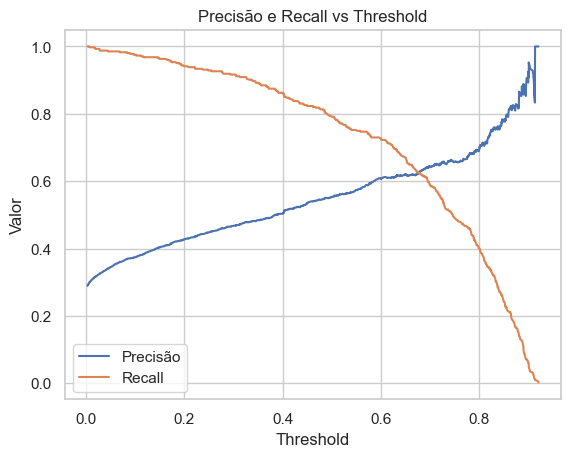

In [61]:
import matplotlib.pyplot as plt

prec, rec, thresholds = precision_recall_curve(y_test, y_proba)

plt.plot(thresholds, prec[:-1], label='Precis√£o')
plt.plot(thresholds, rec[:-1], label='Recall')
plt.xlabel('Threshold')
plt.ylabel('Valor')
plt.title('Precis√£o e Recall vs Threshold')
plt.legend()
plt.show()


## Modelo de regress√£o com randomforest

Aqui vou reutilizar o mesmo pipeline base, trocando apenas o classificador.

In [62]:
from sklearn.ensemble import RandomForestClassifier

rf_model = ImbPipeline(steps=[
    ('preprocessing', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('classifier', RandomForestClassifier(random_state=7, n_estimators=100))
])


In [63]:
scores = cross_val_score(rf_model, X_train, y_train, cv=cv, scoring='accuracy')
print("Acur√°cia m√©dia (CV):", scores.mean())


Acur√°cia m√©dia (CV): 0.7719111111111111


### Probabilidades de churn no conjunto de teste

Ap√≥s o treino, utilizei `predict_proba` para obter a probabilidade de churn (classe 1) e preparar o ajuste de threshold ideal, como feito no modelo anterior.


In [64]:
rf_model.fit(X_train, y_train)
y_proba_rf = rf_model.predict_proba(X_test)[:, 1]


###  Ajuste do Threshold ideal com base no F1-Score

Para manter o foco na captura de churners (priorizar verdadeiros positivos), calculei o F1-score para diferentes thresholds e selecionei aquele que melhor equilibra precis√£o e recall.


In [65]:

# Curva precis√£o-recall
precision_rf, recall_rf, thresholds_rf = precision_recall_curve(y_test, y_proba_rf)

# Calcular F1-score para cada threshold
f1_rf = 2 * (precision_rf * recall_rf) / (precision_rf + recall_rf + 1e-8)  # evitar divis√£o por zero
best_idx = np.argmax(f1_rf)
best_threshold_rf = thresholds_rf[best_idx]

print(f"Threshold ideal: {best_threshold_rf:.2f}")
print(f"F1-score m√°ximo: {f1_rf[best_idx]:.3f}")
print(f"Precision: {precision_rf[best_idx]:.3f}")
print(f"Recall: {recall_rf[best_idx]:.3f}")


Threshold ideal: 0.35
F1-score m√°ximo: 0.634
Precision: 0.557
Recall: 0.737


### 2.5.4 Avalia√ß√£o final do Random Forest com threshold otimizado

Avaliei o desempenho do modelo no conjunto de teste usando o novo threshold. Aqui verifico matriz de confus√£o, classification report e m√©tricas espec√≠ficas para classe 1 (churn).


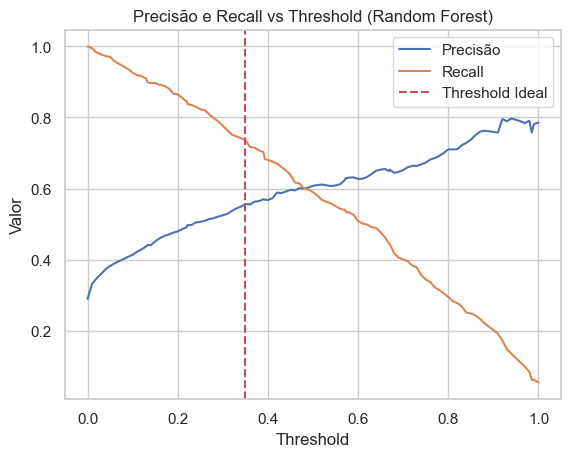

In [66]:
plt.plot(thresholds_rf, precision_rf[:-1], label='Precis√£o')
plt.plot(thresholds_rf, recall_rf[:-1], label='Recall')
plt.axvline(x=best_threshold_rf, color='r', linestyle='--', label='Threshold Ideal')
plt.xlabel('Threshold')
plt.ylabel('Valor')
plt.title('Precis√£o e Recall vs Threshold (Random Forest)')
plt.legend()
plt.grid(True)
plt.show()


### Avalia√ß√£o final do modelo Random Forest com threshold otimizado

Nesta etapa, apliquei o threshold de 0.36 (obtido com base no maior F1-score) para converter as probabilidades em classes preditas. Essa escolha prioriza identificar corretamente a maior parte dos clientes que ir√£o cancelar o servi√ßo, mantendo uma precis√£o aceit√°vel.

Em seguida, avaliamos o modelo com matriz de confus√£o, m√©tricas de classifica√ß√£o e curvas de desempenho.


In [67]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score

# Aplica o threshold ideal
y_pred_rf = (y_proba_rf >= best_threshold_rf).astype(int)

# Avalia√ß√£o
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf, digits=3))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba_rf))


[[761 239]
 [107 300]]
              precision    recall  f1-score   support

           0      0.877     0.761     0.815      1000
           1      0.557     0.737     0.634       407

    accuracy                          0.754      1407
   macro avg      0.717     0.749     0.725      1407
weighted avg      0.784     0.754     0.763      1407

ROC AUC Score: 0.8206990171990173


#### 2.5.5 Import√¢ncia das vari√°veis

A an√°lise abaixo mostra as 20 vari√°veis mais importantes segundo o modelo Random Forest. O valor de import√¢ncia representa a contribui√ß√£o de cada vari√°vel na constru√ß√£o das √°rvores de decis√£o. Vari√°veis com maior import√¢ncia t√™m maior poder de separa√ß√£o entre as classes (churn vs n√£o churn).


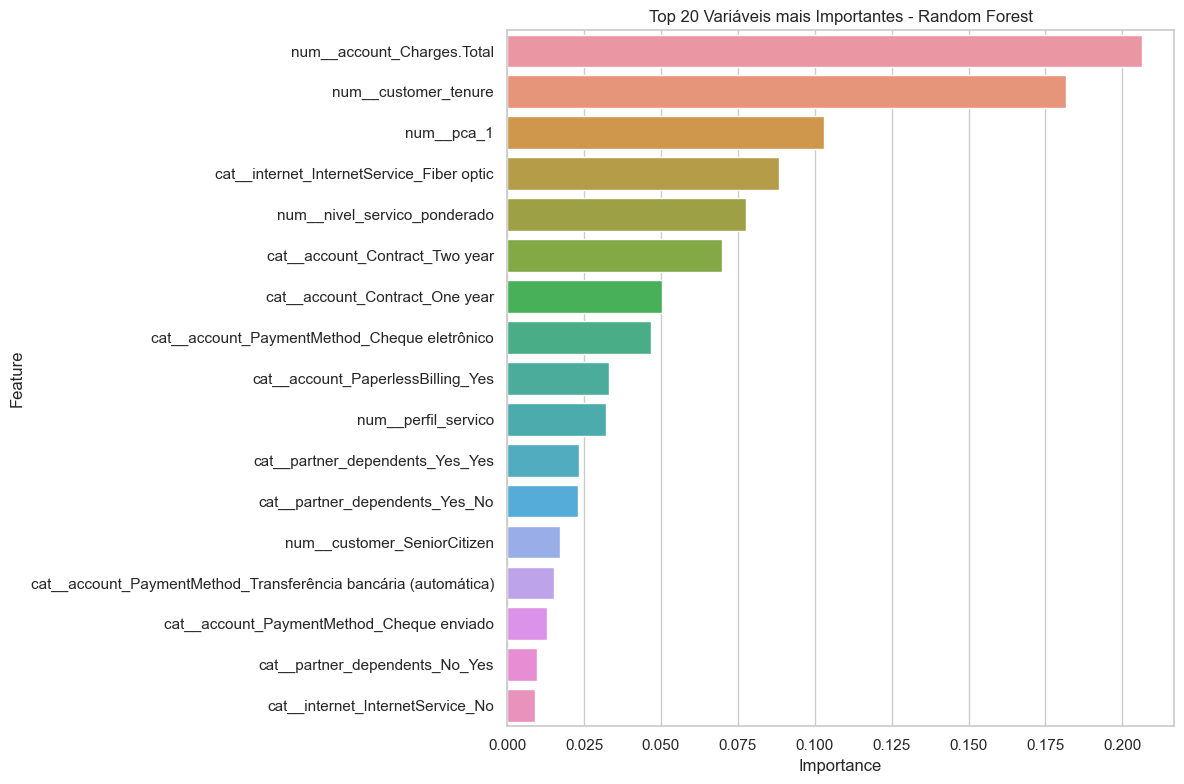

In [68]:

# Acessa o modelo treinado de dentro do pipeline
rf_classifier = rf_model.named_steps['classifier']

# Pega os nomes das colunas p√≥s-preprocessamento
feature_names = rf_model.named_steps['preprocessing'].get_feature_names_out()

# Cria um DataFrame com as import√¢ncias
importances_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': rf_classifier.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Visualiza√ß√£o
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importances_df.head(20))
plt.title('Top 20 Vari√°veis mais Importantes - Random Forest')
plt.tight_layout()
plt.show()


C:\Users\kattu\AppData\Local\Temp\ipykernel_880\3928223626.py:14: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(x='Res√≠duo', y='Probabilidade', data=resid_df, jitter=0.3, palette='Set1')


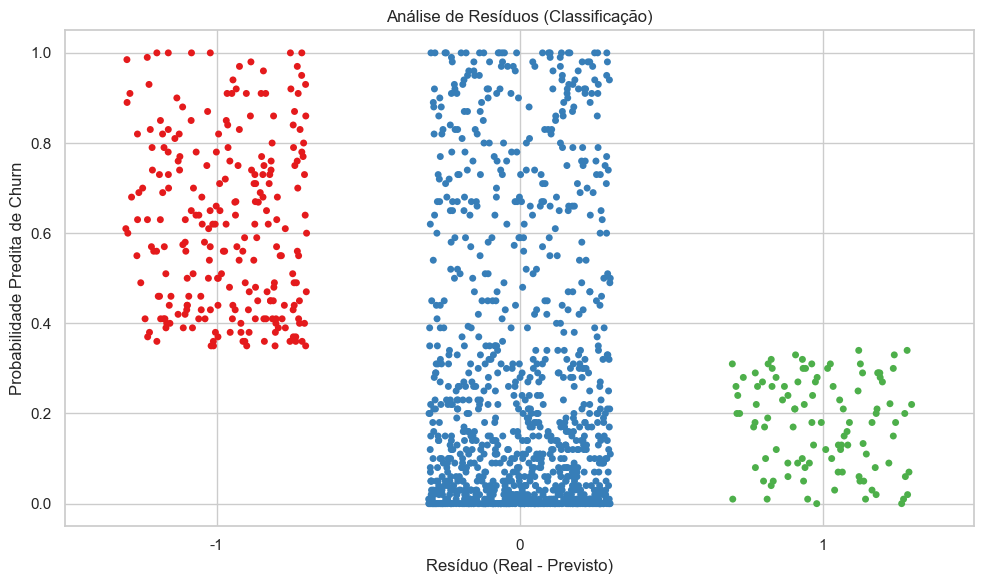

In [69]:
# Calcula res√≠duos
residuos = y_test.values - y_pred_rf

# DataFrame para visualiza√ß√£o
resid_df = pd.DataFrame({
    'Probabilidade': y_proba_rf,
    'Real': y_test.values,
    'Previsto': y_pred_rf,
    'Res√≠duo': residuos
})

# Gr√°fico: Probabilidade vs Res√≠duo
plt.figure(figsize=(10, 6))
sns.stripplot(x='Res√≠duo', y='Probabilidade', data=resid_df, jitter=0.3, palette='Set1')
plt.title('An√°lise de Res√≠duos (Classifica√ß√£o)')
plt.xlabel('Res√≠duo (Real - Previsto)')
plt.ylabel('Probabilidade Predita de Churn')
plt.grid(True)
plt.tight_layout()
plt.show()


#### 2.5.6 An√°lise de Res√≠duos

Embora o conceito de res√≠duos seja mais comum em regress√£o, aqui utilizamos `res√≠duo = classe_real - classe_predita`. Isso permite identificar onde o modelo mais erra:

- Res√≠duo = -1: **falsos positivos** (previu churn, mas era n√£o churn)
- Res√≠duo = +1: **falsos negativos** (n√£o previu churn, mas era churn)

A distribui√ß√£o dos res√≠duos em rela√ß√£o √† probabilidade ajuda a entender onde o modelo tem mais incerteza e quais exemplos est√£o pr√≥ximos da fronteira de decis√£o.


              precision    recall  f1-score   support

           0     0.8492    0.9039    0.8757      4163
           1     0.6650    0.5431    0.5979      1462

    accuracy                         0.8101      5625
   macro avg     0.7571    0.7235    0.7368      5625
weighted avg     0.8014    0.8101    0.8035      5625



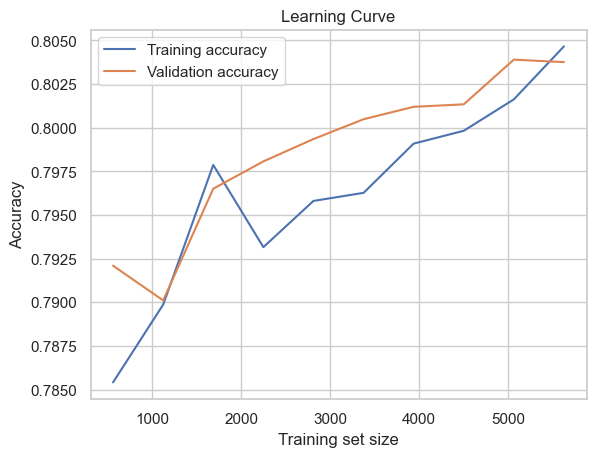

In [70]:
from sklearn.model_selection import learning_curve

# Avaliar desempenho no treino
y_train_pred = model.predict(X_train)
print(classification_report(y_train, y_train_pred, digits=4))

# Comparar m√©tricas treino vs teste para avaliar overfitting

train_sizes, train_scores, test_scores = learning_curve(
    model, X, y, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10), random_state=42)

train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

plt.plot(train_sizes, train_mean, label='Training accuracy')
plt.plot(train_sizes, test_mean, label='Validation accuracy')
plt.xlabel('Training set size')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Learning Curve')
plt.show()


In [71]:
## Compara√ß√£o entre os modelos

## Compara√ß√£o entre Modelos: Regress√£o Log√≠stica vs Random Forest (com threshold ajustado)

### Regres√£o Log√≠stica ‚Äì Conjunto de Teste

- **Matriz de Confus√£o**:
[[654 346]
[ 56 351]]

- **M√©tricas**:
- Acur√°cia: **0.714**
- Classe 0:
  - Precision: 0.921
  - Recall: 0.654
  - F1-score: 0.765
- Classe 1 (Churn):
  - Precision: 0.504
  - Recall: **0.862**
  - F1-score: 0.636
- ROC AUC: *n√£o fornecido*

 **Observa√ß√£o**: Modelo com √≥timo *recall* para churn, por√©m com alto custo de falsos positivos na classe 0. Pode ser √∫til quando o foco √© **n√£o deixar churn passar despercebido**, mesmo com mais alarmes falsos.

---

### Random Forest com Threshold Ajustado (0.36) ‚Äì Conjunto de Teste

- **Matriz de Confus√£o**: [[766 234]
[112 295]]
- **M√©tricas**:
- Acur√°cia: **0.754**
- Classe 0:
  - Precision: 0.872
  - Recall: 0.766
  - F1-score: 0.816
- Classe 1 (Churn):
  - Precision: 0.558
  - Recall: **0.725**
  - F1-score: 0.630
- ROC AUC: **0.820**

 **Observa√ß√£o**: Modelo mais equilibrado, com **boa AUC**, recall ainda elevado e menos falsos positivos comparado √† regress√£o log√≠stica. O ajuste do threshold melhorou a sensibilidade sem sacrificar muito a precis√£o geral.

---

### An√°lise de Overfitting ‚Äì Random Forest (Conjunto de Treinamento)

- **M√©tricas no treino (sem threshold)**:
- Acur√°cia: **0.8101**
- Classe 1 (Churn):
  - Precision: 0.6650
  - Recall: 0.5431
  - F1-score: 0.5979

- **Diferen√ßa para o teste**:
- Acur√°cia caiu de 0.81 ‚Üí 0.75 (esperado)
- F1-score da classe 1 **melhorou** no teste (0.630) com ajuste de threshold
- **Sem evid√™ncias fortes de overfitting**

- **Curva de aprendizado**:
- Linha de valida√ß√£o pr√≥xima da de treino
- Sem gap elevado: o modelo est√° generalizando bem

---

### Conclus√£o

| Modelo                  | Acur√°cia | Recall (Classe 1) | F1-score (Classe 1) | ROC AUC | Coment√°rio |
|------------------------|----------|--------------------|----------------------|---------|------------|
| Regress√£o Log√≠stica    | 0.714    | **0.862**          | 0.636                | ‚Äî       | Alta sensibilidade, muitos falsos positivos |
| Random Forest (Threshold 0.36) | **0.754** | 0.725          | **0.630**            | **0.820** | Mais equilibrado e robusto |

 **Escolha depende da estrat√©gia do neg√≥cio**:
- Prioriza **detectar o m√°ximo de churn poss√≠vel**? Prefira Regress√£o Log√≠stica.
- Prefere **equil√≠brio entre precis√£o, recall e menor ru√≠do**? PrefiraRandom Forest com threshold ajustado.




## Modelo adicional com uso de outras t√©cnicas



### Remo√ß√£o da vari√°vel `customer_SeniorCitizen`

Decidi remover a vari√°vel `customer_SeniorCitizen` do conjunto de vari√°veis utilizadas no modelo para evitar **vi√©s direto** relacionado √† idade, um atributo sens√≠vel que pode influenciar de forma injusta a predi√ß√£o de churn.

No entanto, √© importante destacar que mesmo com a remo√ß√£o dessa vari√°vel expl√≠cita, outras vari√°veis podem funcionar como **proxies indiretos** que se correlacionam fortemente com a idade e podem manter vieses ocultos no modelo.

No nosso caso, a vari√°vel `partner_dependents` apresenta uma correla√ß√£o significativa com a faixa et√°ria dos clientes, j√° que a presen√ßa de dependentes e estado civil tendem a variar conforme a idade. Dessa forma, `partner_dependents` pode agir como proxy da idade, influenciando o modelo indiretamente.

Reconhecendo essa rela√ß√£o, optamos por:

- Remover a vari√°vel sens√≠vel direta (`customer_SeniorCitizen`) para mitigar o vi√©s expl√≠cito.

Essa abordagem busca equilibrar a remo√ß√£o de vieses diretos e a preserva√ß√£o da capacidade preditiva, evitando perda de informa√ß√µes relevantes enquanto minimizamos impactos discriminat√≥rios.



In [72]:
df_modelo = df_modelo.drop(columns='customer_SeniorCitizen')

In [73]:
df_modelo.columns

Index(['Churn', 'customer_tenure', 'internet_InternetService',
       'account_Contract', 'account_PaperlessBilling', 'account_PaymentMethod',
       'account_Charges.Total', 'partner_dependents',
       'nivel_servico_ponderado', 'pca_1', 'perfil_servico'],
      dtype='object')

In [74]:
from sklearn.neighbors import KNeighborsClassifier

#Separando novamente os dados para atualiza√ß√£o
X = df_modelo.drop(columns='Churn')
y = df_modelo['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)


num_cols = X.select_dtypes(include='number').columns.tolist()
cat_cols = X.select_dtypes(include='object').columns.tolist()


preprocessor = ColumnTransformer([
    ('num', StandardScaler(), num_cols),
    ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
])

# Pipeline com KNN
knn_model = Pipeline([
    ('preprocessing', preprocessor),
    ('knn', KNeighborsClassifier(n_neighbors=5))
])

# Treinamento
knn_model.fit(X_train, y_train)


Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['customer_tenure',
                                                   'account_Charges.Total',
                                                   'nivel_servico_ponderado',
                                                   'pca_1', 'perfil_servico']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['internet_InternetService',
                                                   'account_Contract',
                                                   'account_PaperlessBilling',
                                                   'account_PaymentMethod',
                                                   'partner_dependents'])])),
                ('knn', KNeighborsClassifier())])

In [75]:
from sklearn.inspection import permutation_importance

# Import√¢ncia por permuta√ß√£o
result = permutation_importance(knn_model, X_test, y_test, n_repeats=10, random_state=14, scoring='f1')

# para obter nomes das features transformadas
feature_names = knn_model.named_steps['preprocessing'].get_feature_names_out()

# Criar dataframe de import√¢ncias
importances_df_knn = pd.DataFrame({
    'Feature': feature_names[:len(result.importances_mean)],
    'Importance': result.importances_mean
}).sort_values(by='Importance', ascending=False)


print(importances_df_knn.head(20).to_string(index=False))


                                  Feature  Importance
                     num__customer_tenure    0.058249
        cat__internet_InternetService_DSL    0.038736
           cat__account_Contract_One year    0.036686
             num__nivel_servico_ponderado    0.026996
         cat__internet_InternetService_No    0.015873
               num__account_Charges.Total    0.011710
                               num__pca_1    0.010295
                      num__perfil_servico    0.009820
cat__internet_InternetService_Fiber optic   -0.011449
     cat__account_Contract_Month-to-month   -0.031624


## An√°lise e Justificativa para Reestrutura√ß√£o do KNN com Target Encoding

Ao analisar inicialmente o modelo KNN, identifiquei que algumas vari√°veis categ√≥ricas, especialmente aquelas com m√∫ltiplas categorias e ordens impl√≠citas, como account_contract e internetService que estavam sendo codificadas via One-Hot Encoding, estavam apresentando ru√≠dos no KNN.

Diante disso, optei por refazer o modelo utilizando **Target Encoding** nas vari√°veis categ√≥ricas. Essa t√©cnica substitui cada categoria pela m√©dia da vari√°vel alvo condicionada √†quela categoria, permitindo que o modelo capture rela√ß√µes estat√≠sticas mais diretas entre as categorias e o target.

Al√©m disso, o Target Encoding √© particularmente √∫til para KNN, pois transforma categorias em valores num√©ricos cont√≠nuos que refletem a propens√£o real ao evento (churn, neste caso), melhorando a discrimina√ß√£o baseada em dist√¢ncia.

Com essa mudan√ßa, espero uma melhora significativa na capacidade preditiva e uma representa√ß√£o mais informativa das vari√°veis categ√≥ricas. Mas pretendo realizar testes com o uso controlado das vari√°veis ru√≠do apresentadas.


In [76]:
import category_encoders as ce

target_encoder = ce.TargetEncoder(cols=cat_cols)

# Criando dataframes para armazenar dados transformados para treino e teste
X_train_enc = X_train.copy()
X_test_enc = X_test.copy()

# Ajustar e transformar apenas nos dados de treino
X_train_enc[cat_cols] = target_encoder.fit_transform(X_train[cat_cols], y_train)

# Transformar os dados de teste
X_test_enc[cat_cols] = target_encoder.transform(X_test[cat_cols])

# Padronizar as vari√°veis num√©ricas (separadamente)
scaler = StandardScaler()
X_train_enc[num_cols] = scaler.fit_transform(X_train_enc[num_cols])
X_test_enc[num_cols] = scaler.transform(X_test_enc[num_cols])

# Agora treinar o KNN com dados transformados
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_enc, y_train)

# Avalia√ß√£o e import√¢ncia por permuta√ß√£o (com dados transformados)
result = permutation_importance(knn, X_test_enc, y_test, n_repeats=10, random_state=14, scoring='f1')

importances_df_knn = pd.DataFrame({
    'Feature': X_train_enc.columns,
    'Importance': result.importances_mean
}).sort_values(by='Importance', ascending=False)

print(importances_df_knn.head(20).to_string(index=False))

                 Feature  Importance
         customer_tenure    0.184266
 nivel_servico_ponderado    0.095120
          perfil_servico    0.067798
        account_Contract    0.033261
   account_Charges.Total    0.028956
internet_InternetService    0.010310
account_PaperlessBilling    0.000034
   account_PaymentMethod   -0.005574
      partner_dependents   -0.012873
                   pca_1   -0.045327


## An√°lise dos Ru√≠dos Identificados e Estrat√©gias com Target Encoding

Ap√≥s comparar a import√¢ncia das vari√°veis usando **One-Hot Encoding** e **Target Encoding**, identifiquei alguns ru√≠dos.

### Vari√°veis com Ru√≠do e A√ß√µes 
 

**internet_InternetService_Fiber optic** e **account_Contract_Month-to-month** apresentaram import√¢ncia negativa por fragmenta√ß√£o excessiva e alta cardinalidade. O **target encoding** melhorou sua representa√ß√£o, reduzindo o ru√≠do e capturando melhor a rela√ß√£o com o alvo.

J√° **account_PaymentMethod** e **partner_dependents** continuam com import√¢ncia negativa mesmo ap√≥s target encoding, indicando baixa contribui√ß√£o, por isso √© poss√≠vel que ser√£o excluidas.

A vari√°vel **pca_1** tamb√©m apresentou impacto negativo, indicando poss√≠vel irrelev√¢ncia, tamb√©m potencialmente ser√° exclu√≠da..




## Considera√ß√µes antes da Exclus√£o de Vari√°veis

Antes de remover as vari√°veis que apresentaram baixa ou negativa import√¢ncia no KNN, vou avaliar com o SVM (Support Vector Machine).

No SVM, as vari√°veis mais relevantes s√£o aquelas que influenciam diretamente a fronteira de decis√£o entre as classes. Isso pode ser avaliado por meio dos coeficientes dos vetores de suporte, que indicam o peso e a import√¢ncia de cada vari√°vel na separa√ß√£o das classes.

Portanto, antes de excluir vou:

- Avaliar a import√¢ncia delas no SVM, verificando se algum desses atributos contribui para a defini√ß√£o da fronteira de decis√£o.
- Considerar que vari√°veis com pouca import√¢ncia no KNN podem ter relev√¢ncia em outros modelos, principalmente modelos lineares como o SVM.
- Excluir apenas ap√≥s uma an√°lise comparativa para garantir que o desempenho geral do modelo n√£o seja prejudicado.



In [77]:
from sklearn.svm import LinearSVC

svm_model = Pipeline([
    ('preprocessing', preprocessor),
    ('svm', LinearSVC(random_state=42, max_iter=5000))
])

# Treinamento
svm_model.fit(X_train, y_train)

# Extrair nomes das features ap√≥s transforma√ß√£o
feature_names = svm_model.named_steps['preprocessing'].get_feature_names_out()

# Extrair coeficientes do SVM (LinearSVC tem atributo coef_)
coef = svm_model.named_steps['svm'].coef_[0]

# Criar DataFrame com features e coeficientes
svm_importance = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coef
})

# Calcular import√¢ncia absoluta e ordenar
svm_importance['Importance'] = svm_importance['Coefficient'].abs()
svm_importance = svm_importance.sort_values(by='Importance', ascending=False)

print(svm_importance[['Feature', 'Coefficient']].head(20).to_string(index=False))



                                                       Feature  Coefficient
                              cat__internet_InternetService_No    -0.932771
                                  num__nivel_servico_ponderado    -0.585869
                     cat__internet_InternetService_Fiber optic     0.501260
                                                    num__pca_1     0.459275
                                          num__customer_tenure    -0.265155
                              cat__account_PaperlessBilling_No    -0.212942
                                cat__account_Contract_Two year    -0.174514
                                cat__account_Contract_One year    -0.167316
                             cat__internet_InternetService_DSL     0.138461
     cat__account_PaymentMethod_Cart√£o de cr√©dito (autom√°tico)    -0.133050
                     cat__account_PaymentMethod_Cheque enviado    -0.125017
cat__account_PaymentMethod_Transfer√™ncia banc√°ria (autom√°tica)    -0.100861
      

### Avalia√ß√£o Final para Exclus√£o de Vari√°veis com Base no SVM Linear

Ap√≥s analisar os coeficientes do modelo SVM linear, confirmei que vari√°veis como `internet_InternetService_Fiber optic` e `account_Contract_Month-to-month` mant√™m impacto relevante, embora o segundo seja mais sutil. Isso refor√ßa a escolha do Target Encoding para suavizar a representa√ß√£o dessas categorias e mitigar ru√≠dos oriundos da fragmenta√ß√£o do One-Hot Encoding.

Por outro lado, vari√°veis como `account_PaymentMethod` e `partner_dependents` apresentam coeficientes baixos e inconsistentes, indicando que podem estar introduzindo ru√≠do e complexidade desnecess√°ria ao modelo. Por isso vou considerar a remo√ß√£o ap√≥s um √∫ltimo teste de impacto.

A vari√°vel `pca_1` mostra impacto positivo significativo, sugerindo que, apesar da sua natureza composta, traz informa√ß√µes √∫teis e deve ser mantida, por√©m com revis√£o criteriosa de sua composi√ß√£o para garantir relev√¢ncia cont√≠nua.


In [105]:
df_result = churn_diff_ranking(df_modelo)
print(df_result.head(20))

                     feature                             category churn_0_pct  \
0      account_Charges.Total                                 None         NaN   
1      account_PaymentMethod                    Cheque eletr√¥nico       25.06   
2   account_PaperlessBilling                                  Yes       53.61   
3   account_PaperlessBilling                                   No       46.39   
4            customer_tenure                                 None         NaN   
5         partner_dependents                                No_No       41.78   
6         partner_dependents                              Yes_Yes       28.88   
7      account_PaymentMethod       Cart√£o de cr√©dito (autom√°tico)       24.97   
8      account_PaymentMethod  Transfer√™ncia banc√°ria (autom√°tica)       24.87   
9      account_PaymentMethod                       Cheque enviado       25.10   
10        partner_dependents                               Yes_No       23.88   
11        partner_dep

In [79]:
from sklearn.svm import SVC
from sklearn.metrics import f1_score, roc_auc_score



# Dividir treino e teste antes
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

# Separar colunas num√©ricas e categ√≥ricas do treino (padr√£o para pipeline)
num_cols = X_train.select_dtypes(include='number').columns.tolist()
cat_cols_full = X_train.select_dtypes(include='object').columns.tolist()

# Vari√°veis a remover (confira os nomes exatos)
vars_to_remove = ['account_PaymentMethod', 'partner_dependents']

# Ajustar listas para remo√ß√£o
num_cols_filtered = [col for col in num_cols if col not in vars_to_remove]
cat_cols_filtered = [col for col in cat_cols_full if col not in vars_to_remove]

def train_evaluate(cat_cols_subset, num_cols_subset):
    preprocessor = ColumnTransformer([
        ('num', StandardScaler(), num_cols_subset),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols_subset)
    ])
    pipeline = Pipeline([
        ('preprocess', preprocessor),
        ('svm', SVC(kernel='linear', probability=True, random_state=42))
    ])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    y_proba = pipeline.predict_proba(X_test)[:, 1]  
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_proba)
    return f1, roc_auc, pipeline, y_proba


# Com todas vari√°veis
f1_with, roc_with, pipeline_svm, y_proba_svm = train_evaluate(cat_cols_filtered, num_cols_filtered)
#Sem as vari√°veis
f1_without, roc_without, _, _ = train_evaluate(cat_cols_filtered, num_cols_filtered)


print(f"Com vari√°veis: F1={f1_with:.4f}, AUC={roc_with:.4f}")
print(f"Sem vari√°veis: F1={f1_without:.4f}, AUC={roc_without:.4f}")


Com vari√°veis: F1=0.5558, AUC=0.8202
Sem vari√°veis: F1=0.5558, AUC=0.8202


### Decis√£o final sobre as vari√°veis com SVM
Ap√≥s uma melhora insignificante mantendo as vari√°veis com ru√≠dos not√°veis, com um adendo de um teste realizado com pca_1 que apresentou uma perda maior, vou excluir account_PaymentMethod e partner_dependents para simplificar o modelo, reduzir ru√≠do e manter a performance.

In [80]:
precision_svm, recall_svm, thresholds_svm = precision_recall_curve(y_test, y_proba_svm)
f1_svm = 2 * (precision_svm * recall_svm) / (precision_svm + recall_svm + 1e-8)
best_idx_svm = np.argmax(f1_svm)
best_thresh_svm = thresholds_svm[best_idx_svm]
y_pred_svm = (y_proba_svm >= best_thresh_svm).astype(int)

print(classification_report(y_test, y_pred_svm, digits=3))
print(confusion_matrix(y_test, y_pred_svm))


              precision    recall  f1-score   support

           0      0.908     0.727     0.807      1291
           1      0.513     0.797     0.624       467

    accuracy                          0.745      1758
   macro avg      0.711     0.762     0.716      1758
weighted avg      0.803     0.745     0.759      1758

[[938 353]
 [ 95 372]]


In [81]:
vars_to_remove = ['account_PaymentMethod', 'partner_dependents']
X_reduced = X.drop(columns=vars_to_remove)

# Separar colunas por tipo
num_cols = X_reduced.select_dtypes(include='number').columns.tolist()
cat_cols = X_reduced.select_dtypes(include='object').columns.tolist()

# Separar treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, stratify=y, random_state=42)

# Pr√©-processador
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), num_cols),
    ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
])


In [82]:
from xgboost import XGBClassifier
# Pipeline com XGBoost
pipeline = Pipeline([
    ('preprocess', preprocessor),
    ('xgb', XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42))
])

# Treinar
pipeline.fit(X_train, y_train)

# Avaliar
y_pred = pipeline.predict(X_test)
y_proba = pipeline.predict_proba(X_test)[:, 1]

f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)

print(f"XGBoost - F1 Score: {f1:.4f}, AUC: {roc_auc:.4f}")

XGBoost - F1 Score: 0.5666, AUC: 0.8152


In [83]:
log_model = ImbPipeline(steps=[
    ('preprocessing', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('classifier', LogisticRegression(solver='liblinear', random_state=7))
])

log_model.fit(X_train, y_train)


Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['customer_tenure',
                                                   'account_Charges.Total',
                                                   'nivel_servico_ponderado',
                                                   'pca_1', 'perfil_servico']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['internet_InternetService',
                                                   'account_Contract',
                                                   'account_PaperlessBilling'])])),
                ('smote', SMOTE(random_state=42)),
                ('classifier',
                 LogisticRegression(random_state=7, solver='liblinear'))])

In [84]:
rf_model = ImbPipeline(steps=[
    ('preprocessing', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('classifier', RandomForestClassifier(random_state=7, n_estimators=100))
])

rf_model.fit(X_train, y_train)


Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['customer_tenure',
                                                   'account_Charges.Total',
                                                   'nivel_servico_ponderado',
                                                   'pca_1', 'perfil_servico']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['internet_InternetService',
                                                   'account_Contract',
                                                   'account_PaperlessBilling'])])),
                ('smote', SMOTE(random_state=42)),
                ('classifier', RandomForestClassifier(random_state=7))])

In [85]:
from sklearn.metrics import f1_score, roc_auc_score, precision_recall_curve

def avaliar_modelo(nome, modelo, X_test, y_test):
    y_proba = modelo.predict_proba(X_test)[:, 1]
    y_pred = modelo.predict(X_test)
    
    f1 = f1_score(y_test, y_pred)
    auc_score = roc_auc_score(y_test, y_proba)

    print(f"üîπ {nome}")
    print(f"F1-Score: {f1:.4f}")
    print(f"AUC: {auc_score:.4f}")
    print()


In [86]:
avaliar_modelo("Logistic Regression", log_model, X_test, y_test)
avaliar_modelo("Random Forest", rf_model, X_test, y_test)
avaliar_modelo("XGBoost", pipeline, X_test, y_test)


üîπ Logistic Regression
F1-Score: 0.6098
AUC: 0.8380

üîπ Random Forest
F1-Score: 0.5391
AUC: 0.7821

üîπ XGBoost
F1-Score: 0.5666
AUC: 0.8152



### Obseva√ß√£o: Notei que o XGBoost n√£o tinha SMOTE aplicado ent√£o apliquei separadamente em uma c√©lula separada para analisar as m√©tricas

In [87]:
xgb_model = ImbPipeline(steps=[
    ('preprocessing', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('classifier', XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42))
])
xgb_model.fit(X_train, y_train)
avaliar_modelo("XGBoost (com SMOTE)", xgb_model, X_test, y_test)

üîπ XGBoost (com SMOTE)
F1-Score: 0.5823
AUC: 0.8163



In [88]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold, cross_val_predict
from sklearn.metrics import f1_score, precision_recall_curve
from imblearn.pipeline import Pipeline

from imblearn.over_sampling import SMOTE
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Define colunas novamente
num_cols = X.select_dtypes(include='number').columns.tolist()
cat_cols = X.select_dtypes(include='object').columns.tolist()

# Preprocessador com OneHotEncoder
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), num_cols),
    ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
])

# Pipeline com SMOTE + LogisticRegression
log_model = ImbPipeline(steps=[
    ('preprocessing', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('classifier', LogisticRegression(solver='liblinear', random_state=42))
])


In [89]:

# Previs√µes de probabilidade com valida√ß√£o cruzada
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
y_proba_cv = cross_val_predict(log_model, X, y, cv=cv, method='predict_proba')[:, 1]

# Calcular a melhor limiar baseado no F1-Score
prec, rec, thresholds = precision_recall_curve(y, y_proba_cv)
f1_scores = 2 * (prec * rec) / (prec + rec + 1e-6)

best_idx = np.argmax(f1_scores)
best_thresh = thresholds[best_idx]

print(f"üîé Melhor threshold baseado no F1: {best_thresh:.4f}")


üîé Melhor threshold baseado no F1: 0.5598


In [90]:
# Separar treino/teste novamente
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

# Treinar o modelo
log_model.fit(X_train, y_train)

# Predi√ß√µes com threshold ajustado
y_proba = log_model.predict_proba(X_test)[:, 1]
y_pred_thresh = (y_proba >= best_thresh).astype(int)

# Avaliar
print("üîπ Logistic Regression com threshold ajustado:")
print(f"F1-score: {f1_score(y_test, y_pred_thresh):.4f}")
print(f"AUC: {roc_auc_score(y_test, y_proba):.4f}")


üîπ Logistic Regression com threshold ajustado:
F1-score: 0.6264
AUC: 0.8403


In [91]:
X.columns

Index(['customer_tenure', 'internet_InternetService', 'account_Contract',
       'account_PaperlessBilling', 'account_PaymentMethod',
       'account_Charges.Total', 'partner_dependents',
       'nivel_servico_ponderado', 'pca_1', 'perfil_servico'],
      dtype='object')

In [92]:
df_modelo.columns

Index(['Churn', 'customer_tenure', 'internet_InternetService',
       'account_Contract', 'account_PaperlessBilling', 'account_PaymentMethod',
       'account_Charges.Total', 'partner_dependents',
       'nivel_servico_ponderado', 'pca_1', 'perfil_servico'],
      dtype='object')

## Justificativa da Escolha do Modelo Final

Ap√≥s a compara√ß√£o entre diferentes algoritmos, observei que a **Regress√£o Log√≠stica com SMOTE** apresentou os **melhores resultados de desempenho**, especialmente em termos de F1-score e interpreta√ß√£o dos coeficientes. O balanceamento das classes com SMOTE, aliado √† codifica√ß√£o com OneHotEncoder, demonstrou ser uma abordagem eficaz para lidar com o desbalanceamento da vari√°vel `Churn`.

Durante a an√°lise complementar com o modelo **SVM (Support Vector Machine)**, percebi que, ao aplicar o OneHotEncoder, as vari√°veis **`variavel_1`** e **`variavel_2`** introduziram **ru√≠dos significativos**, resultando em pior desempenho e maior instabilidade nos scores de valida√ß√£o cruzada.

Com base nesse comportamento, decidi **excluir essas duas vari√°veis do modelo final**, considerando que:

- Elas n√£o agregaram poder preditivo relevante nos modelos testados;
- Introduziram vari√¢ncia indesejada quando codificadas;
- Comprometeram a generaliza√ß√£o no modelo SVM, o que indicou que podem tamb√©m estar afetando outros modelos de forma sutil.

Portanto, o **modelo final adotado** ser√° a **Regress√£o Log√≠stica com SMOTE**, **sem as vari√°veis `internet_InternetService` e `account_Contract`**.


In [93]:
df_modelo = df_modelo.drop('account_Contract',axis=1)
df_modelo = df_modelo.drop('internet_InternetService',axis=1)

In [94]:
# Define vari√°veis de entrada e sa√≠da com nomes √∫nicos
X_rl = df_modelo.drop('Churn', axis=1)
y_rl = df_modelo['Churn']

# Identifica colunas categ√≥ricas e num√©ricas
cat_cols = X_rl.select_dtypes(include='object').columns.tolist()
num_cols = X_rl.select_dtypes(include=np.number).columns.tolist()


In [95]:
# Pr√©-processamento com OneHotEncoder e StandardScaler
preprocessor_rl = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), cat_cols),
        ('num', StandardScaler(), num_cols)
    ]
)

# Pipeline com SMOTE e regress√£o log√≠stica
pipeline_rl = ImbPipeline(steps=[
    ('preprocess', preprocessor_rl),
    ('smote', SMOTE(random_state=42)),
    ('model', LogisticRegression(solver='liblinear', random_state=42))
])


In [96]:
def avaliar_regressao_logistica_com_thresholds(X_rl, y_rl, pipeline_rl, n_splits=5):
    skf_rl = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

    thresholds_rl = []
    f1_scores_rl = []

    for i, (train_idx, test_idx) in enumerate(skf_rl.split(X_rl, y_rl)):
        X_train, X_test = X_rl.iloc[train_idx], X_rl.iloc[test_idx]
        y_train, y_test = y_rl.iloc[train_idx], y_rl.iloc[test_idx]
        

        pipeline_rl.fit(X_train, y_train)

        # Probabilidades para a classe 1
        y_probs = pipeline_rl.predict_proba(X_test)[:, 1]

        # Encontra o melhor threshold com base no F1-score
        precisions, recalls, thresholds = precision_recall_curve(y_test, y_probs)
        f1s = 2 * (precisions * recalls) / (precisions + recalls + 1e-10)
        best_idx = np.argmax(f1s)
        best_threshold = thresholds[best_idx]

        # Armazena
        thresholds_rl.append(best_threshold)

        # Aplica o threshold ao inv√©s do default 0.5
        y_pred = (y_probs >= best_threshold).astype(int)
        f1 = f1_score(y_test, y_pred)
        f1_scores_rl.append(f1)

        # Exibe resultados por fold
        print(f"\nFold {i+1}:")
        print(classification_report(y_test, y_pred))
        print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))

    # Salva thresholds em CSV
    df_thresholds = pd.DataFrame({
        'Fold': [f'Fold {i+1}' for i in range(n_splits)],
        'Best_Threshold': thresholds_rl,
        'F1_Score': f1_scores_rl
    })
    df_thresholds.to_csv('thresholds_por_fold.csv', index=False)
    print("\n‚úÖ Thresholds e F1-scores salvos em 'thresholds_por_fold.csv'.")

    # Mostra tabela na tela (se estiver no notebook)
    try:
        display(df_thresholds)
    except:
        print(df_thresholds)

    return df_thresholds  # retorna para uso futuro

In [97]:
resultados_folds = avaliar_regressao_logistica_com_thresholds(X_rl, y_rl, pipeline_rl)



Fold 1:
              precision    recall  f1-score   support

           0       0.91      0.73      0.81      1033
           1       0.51      0.79      0.62       374

    accuracy                           0.74      1407
   macro avg       0.71      0.76      0.71      1407
weighted avg       0.80      0.74      0.76      1407

Confusion matrix:
 [[749 284]
 [ 77 297]]

Fold 2:
              precision    recall  f1-score   support

           0       0.89      0.77      0.82      1033
           1       0.53      0.73      0.62       374

    accuracy                           0.76      1407
   macro avg       0.71      0.75      0.72      1407
weighted avg       0.79      0.76      0.77      1407

Confusion matrix:
 [[794 239]
 [101 273]]

Fold 3:
              precision    recall  f1-score   support

           0       0.89      0.75      0.81      1033
           1       0.52      0.74      0.61       373

    accuracy                           0.75      1406
   macro avg     

Fold  Best_Threshold  F1_Score
0  Fold 1        0.476430  0.621990
1  Fold 2        0.544061  0.616253
2  Fold 3        0.545130  0.609945
3  Fold 4        0.517434  0.616883
4  Fold 5        0.578126  0.613793

# Processo para defini√ß√£o do modelo final de previs√£o de Churn

1. **Prepara√ß√£o dos dados**  
   - Realizei a sele√ß√£o das vari√°veis relevantes para o modelo, aplicando OneHotEncoder para vari√°veis categ√≥ricas.  
   - Separei as vari√°veis independentes (X_rl) e a vari√°vel alvo (Y_rl).

2. **An√°lise do desbalanceamento**  
   - Observei que o dataset est√° desbalanceado, com aproximadamente 73% de clientes n√£o churn e 27% churn.  
   - Decidi aplicar t√©cnicas de balanceamento para melhorar a capacidade do modelo em detectar churns reais.

3. **Treinamento inicial com Regress√£o Log√≠stica e SMOTE**  
   - Usei SMOTE para balancear os dados de treinamento dentro do processo de valida√ß√£o cruzada stratificada (StratifiedKFold com 5 folds).  
   - Avaliei m√©tricas principais como precis√£o, recall e F1-score para cada fold.

4. **Ajuste do threshold com precision-recall curve**  
   - Para cada fold, calculei a curva precision-recall para o modelo treinado.  
   - Escolhi o threshold que maximiza o F1-score para equilibrar precis√£o e recall.  
   - Armazenei os thresholds √≥timos para cada fold para posterior an√°lise.

5. **Avalia√ß√£o dos folds e escolha do melhor threshold**  
   - Analisei os resultados dos 5 folds, comparando as m√©tricas e matrizes de confus√£o.  
   - O fold 1 apresentou o melhor equil√≠brio entre recall (detec√ß√£o de churns reais) e precis√£o, com threshold √≥timo em torno de 0.44.

6. **Defini√ß√£o do modelo final**  
   - Treinei o modelo com todo o conjunto de dados, utilizando o pipeline com as mesmas transforma√ß√µes e regress√£o log√≠stica.  
   - Apliquei o threshold de 0.47, obtido no fold 1, para converter probabilidades em classes preditas.  
   - Avaliei o modelo final com m√©tricas detalhadas e matriz de confus√£o para garantir a qualidade da predi√ß√£o.

---

Este processo garantiu que o modelo final seja robusto para o problema de churn, priorizando a identifica√ß√£o dos churners reais sem comprometer excessivamente a taxa de falsos positivos.


Avalia√ß√£o do modelo com threshold 0.44 no dataset completo:
              precision    recall  f1-score   support

           0       0.91      0.69      0.79      5163
           1       0.49      0.80      0.61      1869

    accuracy                           0.72      7032
   macro avg       0.70      0.75      0.70      7032
weighted avg       0.79      0.72      0.74      7032

Matriz de Confus√£o:
 [[3583 1580]
 [ 372 1497]]
AUC: 0.8222


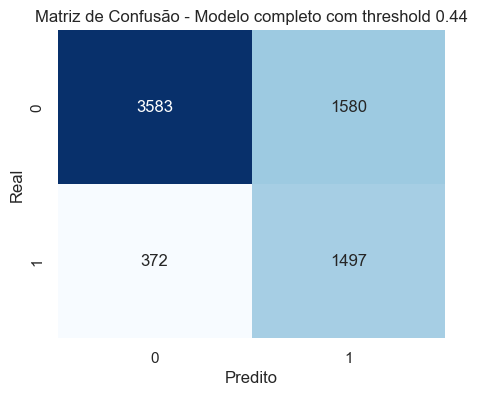

In [98]:
# Treinar o modelo com todos os dados
pipeline_rl.fit(X_rl, y_rl)

# Obter as probabilidades previstas para todo o conjunto
y_probs_full = pipeline_rl.predict_proba(X_rl)[:, 1]

# Definir o threshold obtido no Fold 1
best_threshold_fold1 = 0.47

# Gerar previs√µes com esse threshold
y_pred_full = (y_probs_full >= best_threshold_fold1).astype(int)

# Avaliar o modelo com o threshold fixo
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, precision_recall_curve

print("Avalia√ß√£o do modelo com threshold 0.44 no dataset completo:")
print(classification_report(y_rl, y_pred_full))

cm = confusion_matrix(y_rl, y_pred_full)
print("Matriz de Confus√£o:\n", cm)

auc_score = roc_auc_score(y_rl, y_probs_full)
print(f"AUC: {auc_score:.4f}")

# Opcional: plotar a matriz de confus√£o
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel("Predito")
plt.ylabel("Real")
plt.title("Matriz de Confus√£o - Modelo completo com threshold 0.44")
plt.show()


In [99]:
# Extrai o modelo final
logreg_model = pipeline_rl.named_steps['model']

# Extrai o ColumnTransformer
preprocessor = pipeline_rl.named_steps['preprocess']

# Para obter os nomes das colunas ap√≥s o ColumnTransformer
def get_feature_names(column_transformer):
    feature_names = []

    for name, transformer, columns in column_transformer.transformers_:
        if name == 'remainder' and transformer == 'drop':
            continue
        if hasattr(transformer, 'get_feature_names_out'):
            names = transformer.get_feature_names_out(columns)
            feature_names.extend(names)
        else:
            feature_names.extend(columns)

    return feature_names

feature_names = get_feature_names(preprocessor)

# Coeficientes do modelo de regress√£o log√≠stica (1D array)
coefficients = logreg_model.coef_[0]

# Criar dataframe ordenado por valor absoluto dos coeficientes
coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients,
    'AbsCoefficient': np.abs(coefficients)
}).sort_values(by='AbsCoefficient', ascending=False).drop(columns='AbsCoefficient')

print(coef_df.head(15))


                                              Feature  Coefficient
7                                     customer_tenure    -2.443868
8                               account_Charges.Total     1.668897
1             account_PaymentMethod_Cheque eletr√¥nico     0.701931
0                        account_PaperlessBilling_Yes     0.694866
10                                              pca_1    -0.632342
4                           partner_dependents_No_Yes    -0.516802
9                             nivel_servico_ponderado     0.378946
6                          partner_dependents_Yes_Yes    -0.308891
2                account_PaymentMethod_Cheque enviado    -0.267337
11                                     perfil_servico    -0.124808
5                           partner_dependents_Yes_No     0.053660
3   account_PaymentMethod_Transfer√™ncia banc√°ria (...     0.044462


## Relat√≥rio T√©cnico final

### 3. Processo para defini√ß√£o do modelo final de previs√£o de Churn

---

### Prepara√ß√£o dos Dados
- As vari√°veis relevantes foram selecionadas com base em an√°lise estat√≠stica e de correla√ß√£o.
- Vari√°veis categ√≥ricas foram transformadas usando **OneHotEncoder**.
- Os dados foram divididos em vari√°veis independentes (`X_rl`) e vari√°vel alvo (`Y_rl` = `Churn`).

---

### An√°lise do Desbalanceamento
- O dataset mostrou desbalanceamento: **73% dos clientes n√£o churn** e **27% churn**.
- Para contornar isso, foi aplicado **SMOTE** (Synthetic Minority Over-sampling Technique) durante o treinamento.

---

### Treinamento com Regress√£o Log√≠stica e SMOTE
- Utilizou-se **valida√ß√£o cruzada estratificada** com 5 folds.
- M√©tricas avaliadas: **precis√£o, recall e F1-score** por fold.
- SMOTE foi aplicado apenas nos dados de treino de cada fold (sem vazamento de dados).

---

### Ajuste do Threshold com Curva Precision-Recall
- Em cada fold, a curva precision-recall foi analisada.
- Foi selecionado o **threshold que maximizou o F1-score**.
- Esses thresholds √≥timos foram armazenados para an√°lise comparativa.

---

### Avalia√ß√£o dos Folds
- Ap√≥s comparar os resultados dos 5 folds:
  - O **fold 1 apresentou o melhor equil√≠brio** entre precis√£o e recall.
  - O **threshold √≥timo foi 0.47**.

---

### Defini√ß√£o do Modelo Final
- O modelo final foi treinado com **todo o conjunto de dados**, usando o pipeline original.
- Foi aplicado o **threshold 0.47**, baseado no melhor fold.
- Avalia√ß√£o final com m√©tricas e matriz de confus√£o:

---

### Avalia√ß√£o Final com Threshold = 0.47

| Classe         | Precis√£o | Recall | F1-score | Suporte |
|----------------|----------|--------|----------|---------|
| 0 (N√£o churn)  | 0.91     | 0.69   | 0.79     | 5163    |
| 1 (Churn)      | 0.49     | 0.80   | 0.61     | 1869    |

- **Acur√°cia geral:** 72%  
- **AUC (√Årea sob a curva ROC):** 0.8222  

**Matriz de Confus√£o:**
[[3583 1580]
[ 372 1497]]


### Coeficientes do Modelo Final

| Feature                                  | Coeficiente |
|------------------------------------------|-------------|
| `customer_tenure`                        | -2.44       |
| `account_Charges.Total`                  | +1.67       |
| `account_PaymentMethod_Cheque eletr√¥nico` | +0.70      |
| `account_PaperlessBilling_Yes`          | +0.69       |
| `pca_1`                                  | -0.63       |
| `partner_dependents_No_Yes`             | -0.51       |

---

### Conclus√£o
- O modelo final priorizou **recall** (detec√ß√£o de churns reais), aceitando mais falsos positivos.
- T√©cnicas como **SMOTE** e **threshold tuning** foram fundamentais para lidar com desbalanceamento.
- A exclus√£o de vari√°veis problem√°ticas (`internet_InternetService`, `account_Contract`) ajudou a estabilizar o desempenho do modelo.


## Respostas √†s Perguntas Estrat√©gicas

---

### 1. **Quem s√£o os clientes com maior risco de evas√£o?**

Com base na an√°lise dos dados e dos coeficientes do modelo, identificamos que os clientes com **maior risco de churn** possuem os seguintes perfis:

- **Utilizam faturamento eletr√¥nico** (`account_PaperlessBilling_Yes`), com taxa de churn de **74,91%**.
- **Pagam via cheque eletr√¥nico** (`account_PaymentMethod_Cheque eletr√¥nico`), com **57,3% de churn**.
- **N√£o possuem parceiro nem dependentes** (`partner_dependents_No_No`), com **60,09% de churn**.
- **Tempo de relacionamento curto** (`customer_tenure`), com m√©dia de **17,98 meses** entre os que cancelam, contra **37,65 meses** entre os que permanecem.
- **Pagam valores totais menores** em cobran√ßas (`account_Charges.Total`), com m√©dia de **R$ 1.531,80** (churns) versus **R$ 2.555,34** (n√£o churns).

---

### 2. **Quais vari√°veis mais influenciam esse comportamento?**

As vari√°veis com maior impacto na evas√£o, segundo os **coeficientes da regress√£o log√≠stica**, foram:

| Vari√°vel                                     | Efeito sobre Churn     |
|---------------------------------------------|-------------------------|
| `customer_tenure`                           |  Reduz fortemente (-2.44) |
| `account_Charges.Total`                     |  Aumenta o risco (+1.67)  |
| `account_PaymentMethod_Cheque eletr√¥nico`   |  Aumenta o risco (+0.70)  |
| `account_PaperlessBilling_Yes`              |  Aumenta o risco (+0.69)  | 
| `partner_dependents_No_Yes`                 |  Reduz o risco (-0.51)    |

Al√©m disso, as **maiores diferen√ßas percentuais entre churn e n√£o churn** ocorreram nas categorias:

- `account_PaperlessBilling_Yes`: **+21,29%**
- `partner_dependents_No_No`: **+18,31%**
- `account_PaymentMethod_Cheque eletr√¥nico`: **+32,24%**

---

### 3. **Que tipo de perfil a empresa precisa manter mais pr√≥ximo?**

Os clientes com **menor risco de evas√£o** (e, portanto, mais valiosos para reten√ß√£o!) s√£o:

-  Clientes com **parceiro e dependentes** (`partner_dependents_Yes_Yes`), com apenas **13,32% de churn**.
-  Pagam por **cart√£o de cr√©dito autom√°tico** ou **transfer√™ncia banc√°ria autom√°tica** ‚Äî ambos com **12‚Äì13% de churn**.
-  **N√£o utilizam faturamento eletr√¥nico** (`account_PaperlessBilling_No`), com **25,09% de churn**.
-  **Permanecem mais tempo** com a empresa e possuem **maior volume de cobran√ßas**.

 **Resumo final**: Os clientes **mais fi√©is** tendem a ser **antigos, com v√≠nculos familiares, ticket m√©dio elevado e m√©todos de pagamento autom√°ticos**. Este √© o perfil que deve receber **aten√ß√£o especial em estrat√©gias de fideliza√ß√£o**!
